In [95]:
import glob, json, argparse, os, sys
import string

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Bio.PDB import *

#sys.path.insert(0,'/inhibitory_fragments_structure_prediction')
sys.path.insert(0,'/data1/groups/keatinglab/swans/savinovCollaboration/inhibitory_fragments_structure_prediction')
#from src.colabfold_process_output_utils import *
#from src.colabfold_process_output import *

#import mpl_axes_aligner

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'

plt.rcParams['pdf.fonttype'] = 42  #embed fonts in exported PDFs from matplotlib
plt.rcParams['ps.fonttype'] = 42  #embed fonts in exported Postscript files from matplotlib

In [2]:
pd.set_option('display.max_colwidth', 500); pd.set_option('display.max_columns', 500); pd.set_option('display.max_rows', 200); 

In [18]:
''' ### uncomment to re-generate the merged dataframe of all colabfold results
json_path = '/home/gridsan/sswanson/local_code_mirror/inhibitory_fragments_structure_prediction/colabfold_output.json'

# Load JSON file specifying where to import colabfold results from
# json_path = args.import_json
with open(json_path,"r") as file:
    colab_results = json.loads(file.read())

# For each gene and condition, import available data and create individual dataframes
df_list = []
merge_on_list = ['fragment_name','start','end']
count = 0
for gene_name in colab_results:
    print('gene_name:',gene_name)
    for condition in colab_results[gene_name]:
        print('condition:',condition)
        # Load confidence (pLDDT/iPTM)
        confidence_df = get_confidence_dataframe(colab_results[gene_name][condition]['colabfold'])

        # Count contacts
        contacts_df = get_contact_dataframe(colab_results[gene_name][condition]['colabfold'])

        # TODO calculate RMSD

        # Merge dataframes into a single one containing all types of data
        comb_df = confidence_df.merge(contacts_df,on=merge_on_list,indicator=True,validate="one_to_one")

        # Calculate the weighted contacts
        comb_df['weighted_contacts'] = comb_df['n_contacts'] * comb_df['iptm']

        df_list.append(comb_df)
        count += 1
        if count >= 3:
            break


# Concatenate all dataframes into a single dataframe that stores all the data. Merge with experimental data df 
concat_df = pd.concat(df_list,ignore_index=True)
concat_df.to_csv("colabfold_predictions.csv")
print(f"Dataframe with {len(concat_df)} entries total")
'''

gene_name: folA
condition: 30aa_monomer_folA
gene_name: fstZ
condition: 30aa_monomer_fstZ


KeyboardInterrupt: 

In [12]:
concat_df

fragment_name  start  aa.fragmentCenter_x  end      iptm  \
0      folA_1-159_folA_7-36      7                 21.5   36  0.103046   
1      folA_1-159_folA_8-37      8                 22.5   37  0.105501   
2      folA_1-159_folA_9-38      9                 23.5   38  0.123415   
3     folA_1-159_folA_10-39     10                 24.5   39  0.123641   
4     folA_1-159_folA_11-40     11                 25.5   40  0.143685   
...                     ...    ...                  ...  ...       ...   
2391  ssb_1-178_ssb_115-144    115                129.5  144  0.041977   
2392  ssb_1-178_ssb_116-145    116                130.5  145  0.042507   
2393  ssb_1-178_ssb_117-146    117                131.5  146  0.037696   
2394  ssb_1-178_ssb_118-147    118                132.5  147  0.043669   
2395  ssb_1-178_ssb_119-148    119                133.5  148  0.042710   

          plddt  aa.fragmentCenter_y  n_contacts  \
0     84.774000                 21.5           0   
1     86.700667                 22.5           0   
2     83.461667                 23.5           1   
3     83.581000                 24.5           2   
4     83.008667                 25.5           1   
...         ...                  ...         ...   
2391  56.419000                129.5           0   
2392  58.255667                130.5           0   
2393  48.113333                131.5           0   
2394  58.134000                132.5           0   
2395  58.732000                133.5           0   

                                                   path _merge  \
0     /data1/groups/keatinglab/swans/savinovCollabor...   both   
1     /data1/groups/keatinglab/swans/savinovCollabor...   both   
2     /data1/groups/keatinglab/swans/savinovCollabor...   both   
3     /data1/groups/keatinglab/swans/savinovCollabor...   both   
4     /data1/groups/keatinglab/swans/savinovCollabor...   both   
...                                                 ...    ...   
2391  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2392  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2393  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2394  /data1/groups/keatinglab/swans/savinovCollabor...   both   
2395  /data1/groups/keatinglab/swans/savinovCollabor...   both   

      weighted_contacts  
0              0.000000  
1              0.000000  
2              0.123415  
3              0.247281  
4              0.143685  
...                 ...  
2391           0.000000  
2392           0.000000  
2393           0.000000  
2394           0.000000  
2395           0.000000  

[2396 rows x 11 columns]

In [15]:
concat_df[concat_df['_merge']!='both']

Empty DataFrame
Columns: [fragment_name, start, aa.fragmentCenter_x, end, iptm, plddt, aa.fragmentCenter_y, n_contacts, path, _merge, weighted_contacts]
Index: []

In [3]:
path1 = '/data1/groups/keatinglab/swans/savinovCollaboration/analysis/process_colabfold_output/'+'colabfold_predictions.csv'
colabfold_df = pd.read_csv(path1,index_col=0)
colabfold_df = colabfold_df.rename(columns=\
                                     {'fragment start (aa)':'aa.start',\
                                      'fragment end (aa)':'aa.stop',\
                                      'fragment center (aa)':'aa.fragmentCenter',\
                                      'fragment length (aa)':'aa.fragmentLength'})
colabfold_df.tail(10)

fragment_name  aa.start  aa.fragmentCenter  aa.stop  \
4611  ssb4copies_1-178_ssb_140-169       140              154.5      169   
4612  ssb4copies_1-178_ssb_141-170       141              155.5      170   
4613  ssb4copies_1-178_ssb_142-171       142              156.5      171   
4614  ssb4copies_1-178_ssb_143-172       143              157.5      172   
4615  ssb4copies_1-178_ssb_144-173       144              158.5      173   
4616  ssb4copies_1-178_ssb_145-174       145              159.5      174   
4617  ssb4copies_1-178_ssb_146-175       146              160.5      175   
4618  ssb4copies_1-178_ssb_147-176       147              161.5      176   
4619  ssb4copies_1-178_ssb_148-177       148              162.5      177   
4620  ssb4copies_1-178_ssb_149-178       149              163.5      178   

          iptm      plddt  n_contacts  \
4611  0.680645  35.967000           0   
4612  0.677199  32.524333           0   
4613  0.676234  32.212000           1   
4614  0.688283  35.050667           1   
4615  0.687869  34.994000           1   
4616  0.689092  35.271667           0   
4617  0.687369  36.244667           0   
4618  0.683096  31.469667           1   
4619  0.690097  34.799667           2   
4620  0.693337  35.706000           2   

                                                                                                                                                                                              path  \
4611  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_140-169/output/ssb4copies_1-178_ssb_140-169_unrelaxed_rank_1_model_3.pdb   
4612  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_141-170/output/ssb4copies_1-178_ssb_141-170_unrelaxed_rank_1_model_5.pdb   
4613  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_142-171/output/ssb4copies_1-178_ssb_142-171_unrelaxed_rank_1_model_5.pdb   
4614  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_143-172/output/ssb4copies_1-178_ssb_143-172_unrelaxed_rank_1_model_3.pdb   
4615  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_144-173/output/ssb4copies_1-178_ssb_144-173_unrelaxed_rank_1_model_3.pdb   
4616  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_145-174/output/ssb4copies_1-178_ssb_145-174_unrelaxed_rank_1_model_3.pdb   
4617  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_146-175/output/ssb4copies_1-178_ssb_146-175_unrelaxed_rank_1_model_3.pdb   
4618  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_147-176/output/ssb4copies_1-178_ssb_147-176_unrelaxed_rank_1_model_5.pdb   
4619  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_148-177/output/ssb4copies_1-178_ssb_148-177_unrelaxed_rank_1_model_3.pdb   
4620  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_149-178/output/ssb4copies_1-178_ssb_149-178_unrelaxed_rank_1_model_3.pdb   

     _merge  weighted_contacts gene          condition  
4611   both           0.000000  ssb  30aa_tetramer_ssb  
4612   both           0.000000  ssb  30aa_tetramer_ssb  
4613   both           0.676234  ssb  30aa_tetramer_ssb  
4614   both           0.688283  ssb  30aa_tetramer_ssb  
4615   both           0.687869  ssb  30aa_tetramer_ssb  
4616   both           0.000000  ssb  30aa_tetramer_ssb  
4617   both           0.000000  ssb  30aa_tetramer_ssb  
4618   both           0.683096  ssb  30aa_tetramer_ssb  
4619   both           1.380195  ssb  30a

In [4]:
'''
exportpath = '/data1/groups/keatinglab/swans/savinovCollaboration/analysis/process_colabfold_output/'\
+ 'colabfold_predictions_legacyFormat.csv'

colabfold_df.to_csv(exportpath)
'''

"\nexportpath = '/data1/groups/keatinglab/swans/savinovCollaboration/analysis/process_colabfold_output/'+ 'colabfold_predictions_legacyFormat.csv'\n\ncolabfold_df.to_csv(exportpath)\n"

In [5]:
##path2 = '/data1/groups/keatinglab/swans/savinovCollaboration/files/'+'inhibmapping.csv'
path2 = '/data1/groups/keatinglab/swans/savinovCollaboration/inhibitory_fragments_structure_prediction/data/'\
+'Savinov_2022_inhib_peptide_mapping.csv'
inhibition_df = pd.read_csv(path2,index_col=None)
inhibition_df = inhibition_df.rename(columns=\
                                     {'fragment start (aa)':'aa.start',\
                                      'fragment end (aa)':'aa.stop',\
                                      'fragment center (aa)':'aa.fragmentCenter',\
                                      'fragment length (aa)':'aa.fragmentLength'})
inhibition_df.tail(10)

gene                        fragment ID  aa.start  \
12070  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_457_531_+       153   
12071  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_460_519_+       154   
12072  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_460_531_+       154   
12073  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_460_534_+       154   
12074  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_463_522_+       155   
12075  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_466_510_+       156   
12076  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_466_525_+       156   
12077  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_469_528_+       157   
12078  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_472_531_+       158   
12079  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_475_534_+       159   

       aa.stop  aa.fragmentCenter  aa.fragmentLength  \
12070      177              165.0                 25   
12071      173              163.5                 20   
12072      177              165.5                 24   
12073      178              166.0                 25   
12074      174              164.5                 20   
12075      170              163.0                 15   
12076      175              165.5                 20   
12077      176              166.5                 20   
12078      177              167.5                 20   
12079      178              168.5                 20   

       E = inhibitory effect (enrichment)    sem(E)  \
12070                            1.024260  0.048185   
12071                           -0.764310  0.130626   
12072                           -0.378256  0.312976   
12073                           -1.228331  0.240437   
12074                           -0.457376  0.026772   
12075                           -0.088757  0.425062   
12076                            0.241237  0.162285   
12077                            0.269504  0.051534   
12078                            0.112903  0.120788   
12079                           -0.726196  0.118007   

      hydrophobicity_KyteDoolittle_classifier  \
12070                             hydrophilic   
12071                             hydrophilic   
12072                             hydrophilic   
12073                             hydrophilic   
12074                             hydrophilic   
12075                             hydrophilic   
12076                             hydrophilic   
12077                             hydrophilic   
12078                             hydrophilic   
12079                             hydrophilic   

      instabIndex_Guruprasad_classifier charge_Lehninger_classifier  \
12070                          unstable                    negative   
12071                          unstable                    negative   
12072                          unstable                    negative   
12073                          unstable                    negative   
12074                          unstable                    negative   
12075                          unstable                    negative   
12076                          unstable                    negative   
12077                          unstable                    negative   
12078                          unstable                    negative   
12079                          unstable                    negative   

       frag_contains_alphaHelix  frag_contains_betaStrand  frag_contains_Turn  \
12070                       0.0                       0.0                 0.0   
12071                       0.0                       0.0                 0.0   
12072                       0.0                       0.0                 0.0   
12073                       0.0                       0.0                 0.0   
12074                       0.0                       0.0                 0.0   
12075                       0.0                       0.0                 0.0   
12076                       0.0             

In [6]:
inhibition_df[['fragmented_protein','CDS?','species']] = inhibition_df['gene'].str.split(pat='-',expand=True)
inhibition_df.tail(10)

gene                        fragment ID  aa.start  \
12070  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_457_531_+       153   
12071  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_460_519_+       154   
12072  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_460_531_+       154   
12073  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_460_534_+       154   
12074  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_463_522_+       155   
12075  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_466_510_+       156   
12076  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_466_525_+       156   
12077  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_469_528_+       157   
12078  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_472_531_+       158   
12079  ssb-coding-EcoliBL21DE3  ssb-coding-EcoliBL21DE3_475_534_+       159   

       aa.stop  aa.fragmentCenter  aa.fragmentLength  \
12070      177              165.0                 25   
12071      173              163.5                 20   
12072      177              165.5                 24   
12073      178              166.0                 25   
12074      174              164.5                 20   
12075      170              163.0                 15   
12076      175              165.5                 20   
12077      176              166.5                 20   
12078      177              167.5                 20   
12079      178              168.5                 20   

       E = inhibitory effect (enrichment)    sem(E)  \
12070                            1.024260  0.048185   
12071                           -0.764310  0.130626   
12072                           -0.378256  0.312976   
12073                           -1.228331  0.240437   
12074                           -0.457376  0.026772   
12075                           -0.088757  0.425062   
12076                            0.241237  0.162285   
12077                            0.269504  0.051534   
12078                            0.112903  0.120788   
12079                           -0.726196  0.118007   

      hydrophobicity_KyteDoolittle_classifier  \
12070                             hydrophilic   
12071                             hydrophilic   
12072                             hydrophilic   
12073                             hydrophilic   
12074                             hydrophilic   
12075                             hydrophilic   
12076                             hydrophilic   
12077                             hydrophilic   
12078                             hydrophilic   
12079                             hydrophilic   

      instabIndex_Guruprasad_classifier charge_Lehninger_classifier  \
12070                          unstable                    negative   
12071                          unstable                    negative   
12072                          unstable                    negative   
12073                          unstable                    negative   
12074                          unstable                    negative   
12075                          unstable                    negative   
12076                          unstable                    negative   
12077                          unstable                    negative   
12078                          unstable                    negative   
12079                          unstable                    negative   

       frag_contains_alphaHelix  frag_contains_betaStrand  frag_contains_Turn  \
12070                       0.0                       0.0                 0.0   
12071                       0.0                       0.0                 0.0   
12072                       0.0                       0.0                 0.0   
12073                       0.0                       0.0                 0.0   
12074                       0.0                       0.0                 0.0   
12075                       0.0                       0.0                 0.0   
12076                       0.0             

In [7]:
colabfold_df\
[['protein_partner','protein_partner_aa.start','protein_partner_aa.stop','fragmented_protein','aa.start','aa.stop']]\
= colabfold_df['fragment_name'].str.split(pat='_|-',expand=True)

colabfold_df.tail(10)

fragment_name aa.start  aa.fragmentCenter aa.stop  \
4611  ssb4copies_1-178_ssb_140-169      140              154.5     169   
4612  ssb4copies_1-178_ssb_141-170      141              155.5     170   
4613  ssb4copies_1-178_ssb_142-171      142              156.5     171   
4614  ssb4copies_1-178_ssb_143-172      143              157.5     172   
4615  ssb4copies_1-178_ssb_144-173      144              158.5     173   
4616  ssb4copies_1-178_ssb_145-174      145              159.5     174   
4617  ssb4copies_1-178_ssb_146-175      146              160.5     175   
4618  ssb4copies_1-178_ssb_147-176      147              161.5     176   
4619  ssb4copies_1-178_ssb_148-177      148              162.5     177   
4620  ssb4copies_1-178_ssb_149-178      149              163.5     178   

          iptm      plddt  n_contacts  \
4611  0.680645  35.967000           0   
4612  0.677199  32.524333           0   
4613  0.676234  32.212000           1   
4614  0.688283  35.050667           1   
4615  0.687869  34.994000           1   
4616  0.689092  35.271667           0   
4617  0.687369  36.244667           0   
4618  0.683096  31.469667           1   
4619  0.690097  34.799667           2   
4620  0.693337  35.706000           2   

                                                                                                                                                                                              path  \
4611  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_140-169/output/ssb4copies_1-178_ssb_140-169_unrelaxed_rank_1_model_3.pdb   
4612  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_141-170/output/ssb4copies_1-178_ssb_141-170_unrelaxed_rank_1_model_5.pdb   
4613  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_142-171/output/ssb4copies_1-178_ssb_142-171_unrelaxed_rank_1_model_5.pdb   
4614  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_143-172/output/ssb4copies_1-178_ssb_143-172_unrelaxed_rank_1_model_3.pdb   
4615  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_144-173/output/ssb4copies_1-178_ssb_144-173_unrelaxed_rank_1_model_3.pdb   
4616  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_145-174/output/ssb4copies_1-178_ssb_145-174_unrelaxed_rank_1_model_3.pdb   
4617  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_146-175/output/ssb4copies_1-178_ssb_146-175_unrelaxed_rank_1_model_3.pdb   
4618  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_147-176/output/ssb4copies_1-178_ssb_147-176_unrelaxed_rank_1_model_5.pdb   
4619  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_148-177/output/ssb4copies_1-178_ssb_148-177_unrelaxed_rank_1_model_3.pdb   
4620  /data1/groups/keatinglab/swans/savinovCollaboration/ssb/data/230109_colabfold_ssbtetramer/data/ssb4copies_1-178_ssb_149-178/output/ssb4copies_1-178_ssb_149-178_unrelaxed_rank_1_model_3.pdb   

     _merge  weighted_contacts gene          condition protein_partner  \
4611   both           0.000000  ssb  30aa_tetramer_ssb      ssb4copies   
4612   both           0.000000  ssb  30aa_tetramer_ssb      ssb4copies   
4613   both           0.676234  ssb  30aa_tetramer_ssb      ssb4copies   
4614   both           0.688283  ssb  30aa_tetramer_ssb      ssb4copies   
4615   both           0.687869  ssb  30aa_tetramer_ssb      ssb4copies   
4616   both           0.000000  ssb  30aa_tetramer_ssb      ssb4copies   
4617   both           0.000000  ssb  30aa_tetramer_ssb   

In [8]:
colabfold_df[["protein_partner_aa.start", "protein_partner_aa.stop", "aa.start", "aa.stop"]]\
= colabfold_df[["protein_partner_aa.start", "protein_partner_aa.stop", "aa.start", "aa.stop"]].apply(pd.to_numeric)

In [9]:
colabfold_df.loc[colabfold_df['fragmented_protein'] == 'FtsZ', 'fragmented_protein'] = 'ftsZ'
colabfold_df.loc[colabfold_df['fragmented_protein'] == 'groEL', 'fragmented_protein'] = 'groL'
colabfold_df.loc[colabfold_df['protein_partner'] == 'FtsZ', 'protein_partner'] = 'ftsZ'
colabfold_df.loc[colabfold_df['protein_partner'] == 'groEL', 'protein_partner'] = 'groL'
colabfold_df.loc[colabfold_df['protein_partner'] == 'groEL2copies', 'protein_partner'] = 'groL2copies'
colabfold_df.loc[colabfold_df['protein_partner'] == 'groES1copies', 'protein_partner'] = 'groS1copies'

In [10]:
predVsExpt_df = colabfold_df.merge(inhibition_df, how='inner', on=["fragmented_protein","aa.start","aa.stop","aa.fragmentCenter"])
/print colabfold_df.shape
/print inhibition_df.shape
/print predVsExpt_df.shape

(4621, 16)
(12080, 18)
(4211, 30)


In [11]:
predVsExpt_df[['protein_partner','fragmented_protein','aa.start','aa.stop',\
               'E = inhibitory effect (enrichment)','n_contacts','weighted_contacts']].tail(10)

protein_partner fragmented_protein  aa.start  aa.stop  \
4201      ssb2copies                ssb       145      174   
4202      ssb4copies                ssb       145      174   
4203      ssb2copies                ssb       146      175   
4204      ssb4copies                ssb       146      175   
4205      ssb2copies                ssb       147      176   
4206      ssb4copies                ssb       147      176   
4207      ssb2copies                ssb       148      177   
4208      ssb4copies                ssb       148      177   
4209      ssb2copies                ssb       149      178   
4210      ssb4copies                ssb       149      178   

      E = inhibitory effect (enrichment)  n_contacts  weighted_contacts  
4201                           -0.924184           0           0.000000  
4202                           -0.924184           0           0.000000  
4203                           -0.436107           0           0.000000  
4204                           -0.436107           0           0.000000  
4205                            0.508135           1           0.620216  
4206                            0.508135           1           0.683096  
4207                           -0.399455           0           0.000000  
4208                           -0.399455           2           1.380195  
4209                           -1.006461           0           0.000000  
4210                           -1.006461           2           1.386674

In [12]:
predVsExpt_df.head(10)

fragment_name  aa.start  aa.fragmentCenter  aa.stop      iptm  \
0   folA_1-159_folA_7-36         7               21.5       36  0.103046   
1   folA_1-159_folA_8-37         8               22.5       37  0.105501   
2   folA_1-159_folA_9-38         9               23.5       38  0.123415   
3  folA_1-159_folA_10-39        10               24.5       39  0.123641   
4  folA_1-159_folA_11-40        11               25.5       40  0.143685   
5  folA_1-159_folA_12-41        12               26.5       41  0.155155   
6  folA_1-159_folA_13-42        13               27.5       42  0.262857   
7  folA_1-159_folA_14-43        14               28.5       43  0.218872   
8  folA_1-159_folA_15-44        15               29.5       44  0.123864   
9  folA_1-159_folA_16-45        16               30.5       45  0.339024   

       plddt  n_contacts  \
0  84.774000           0   
1  86.700667           0   
2  83.461667           1   
3  83.581000           2   
4  83.008667           1   
5  84.400000           3   
6  84.306667           3   
7  80.763333           3   
8  84.626667           2   
9  83.648000           3   

                                                                                                                                                                  path  \
0    /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_7-36/output/folA_1-159_folA_7-36_unrelaxed_rank_1_model_5.pdb   
1    /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_8-37/output/folA_1-159_folA_8-37_unrelaxed_rank_1_model_5.pdb   
2    /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_9-38/output/folA_1-159_folA_9-38_unrelaxed_rank_1_model_5.pdb   
3  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_10-39/output/folA_1-159_folA_10-39_unrelaxed_rank_1_model_1.pdb   
4  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_11-40/output/folA_1-159_folA_11-40_unrelaxed_rank_1_model_4.pdb   
5  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_12-41/output/folA_1-159_folA_12-41_unrelaxed_rank_1_model_3.pdb   
6  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_13-42/output/folA_1-159_folA_13-42_unrelaxed_rank_1_model_4.pdb   
7  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_14-43/output/folA_1-159_folA_14-43_unrelaxed_rank_1_model_4.pdb   
8  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_15-44/output/folA_1-159_folA_15-44_unrelaxed_rank_1_model_3.pdb   
9  /data1/groups/keatinglab/swans/savinovCollaboration/folA/data/221127_colabfold/data/folA_1-159_folA_16-45/output/folA_1-159_folA_16-45_unrelaxed_rank_1_model_4.pdb   

  _merge  weighted_contacts gene_x          condition protein_partner  \
0   both           0.000000   folA  30aa_monomer_folA            folA   
1   both           0.000000   folA  30aa_monomer_folA            folA   
2   both           0.123415   folA  30aa_monomer_folA            folA   
3   both           0.247281   folA  30aa_monomer_folA            folA   
4   both           0.143685   folA  30aa_monomer_folA            folA   
5   both           0.465465   folA  30aa_monomer_folA            folA   
6   both           0.788572   folA  30aa_monomer_folA            folA   
7   both           0.656615   folA  30aa_monomer_folA            folA   
8   both           0.247728   folA  30aa_monomer_folA            folA   
9   both           1.017072   folA  30aa_monomer_folA            folA   

   protein_partner_aa.start  protein_partner_aa.stop fragmented_protein  \
0                         1                      159               folA   
1                         1             

In [13]:
/print colabfold_df['fragmented_protein'].unique()
/print colabfold_df['protein_partner'].unique()
/print predVsExpt_df['fragmented_protein'].unique()
/print predVsExpt_df['protein_partner'].unique()

['folA' 'ftsZ' 'groL' 'gyrA' 'lptG' 'rpIL' 'rplL' 'ssb']
['folA' 'ftsZ' 'groL' 'groL2copies' 'groS1copies' 'gyrA' 'gyrB1copies'
 'lptG' 'lptF1copies' 'rpIL' 'rplJ1copies' 'ssb' 'ssb2copies' 'ssb4copies']
['folA' 'ftsZ' 'groL' 'gyrA' 'lptG' 'rpIL' 'ssb']
['folA' 'ftsZ' 'groL' 'groL2copies' 'groS1copies' 'gyrA' 'gyrB1copies'
 'lptG' 'lptF1copies' 'rpIL' 'ssb' 'ssb2copies' 'ssb4copies']


In [14]:
genes = ['folA', 'ftsZ', 'groL', 'groL', 'groL', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb', 'ssb']
protein_partners =\
['folA', 'ftsZ', 'groL', 'groL2copies', 'groS1copies', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb2copies', 'ssb4copies']
/print len(protein_partners)
/print len(genes)

11
11


In [15]:
/print np.arange(1,len(genes),1)

[ 1  2  3  4  5  6  7  8  9 10]


In [16]:
/print protein_partners[0]

folA


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__folA_frags_+_folA


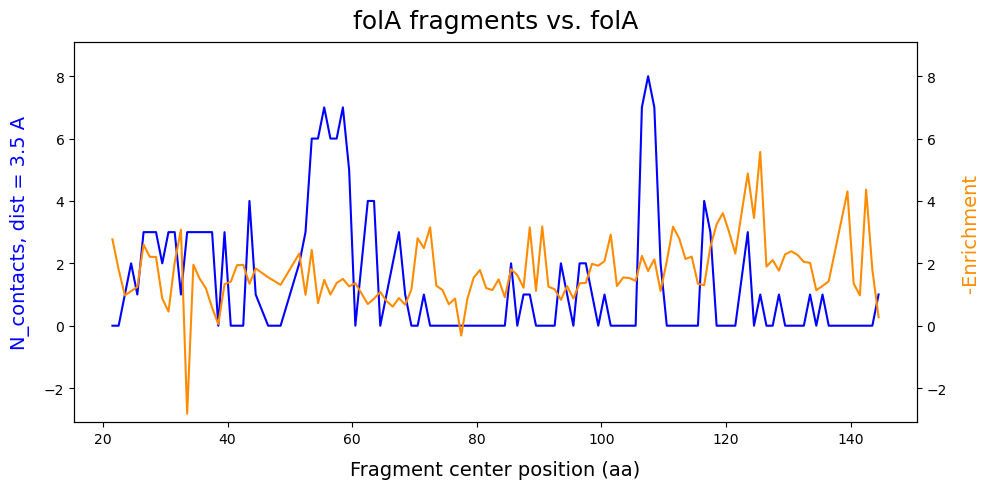

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ftsZ_frags_+_ftsZ


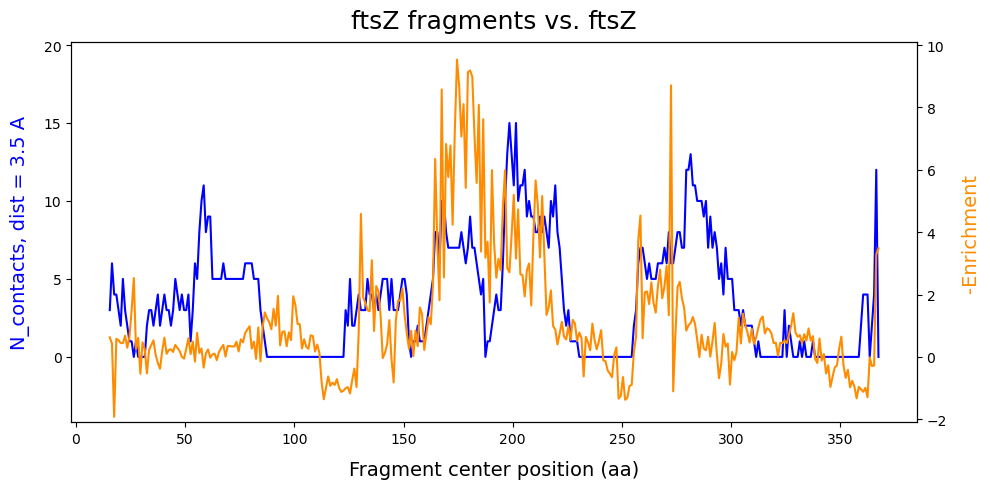

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__groL_frags_+_groL


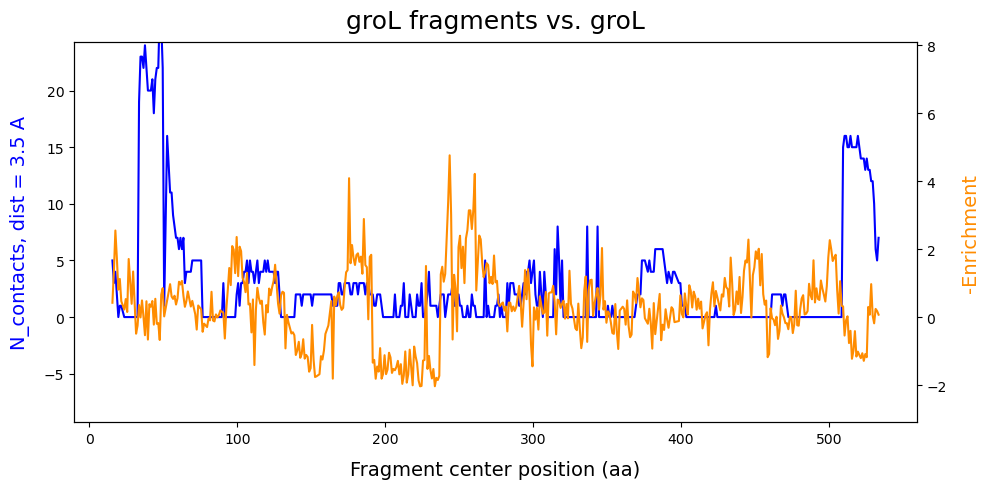

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__groL_frags_+_groL2copies


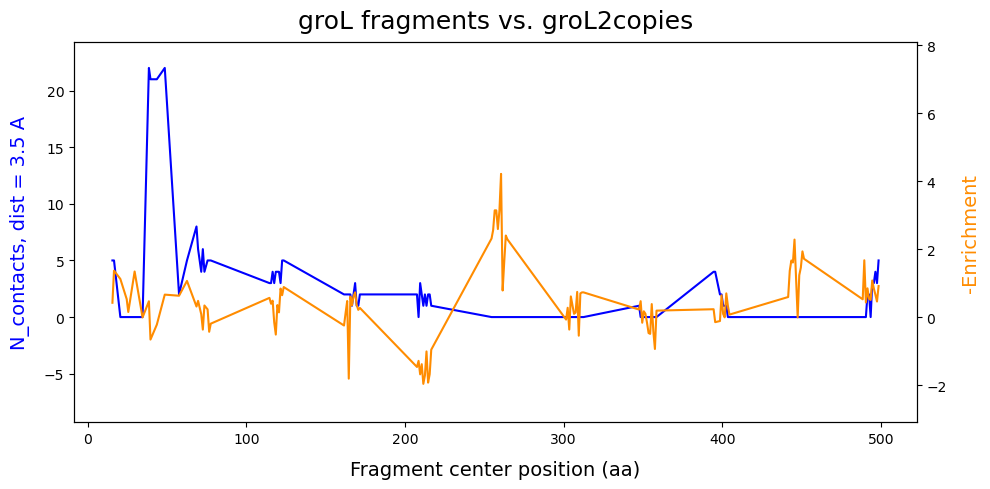

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__groL_frags_+_groS1copies


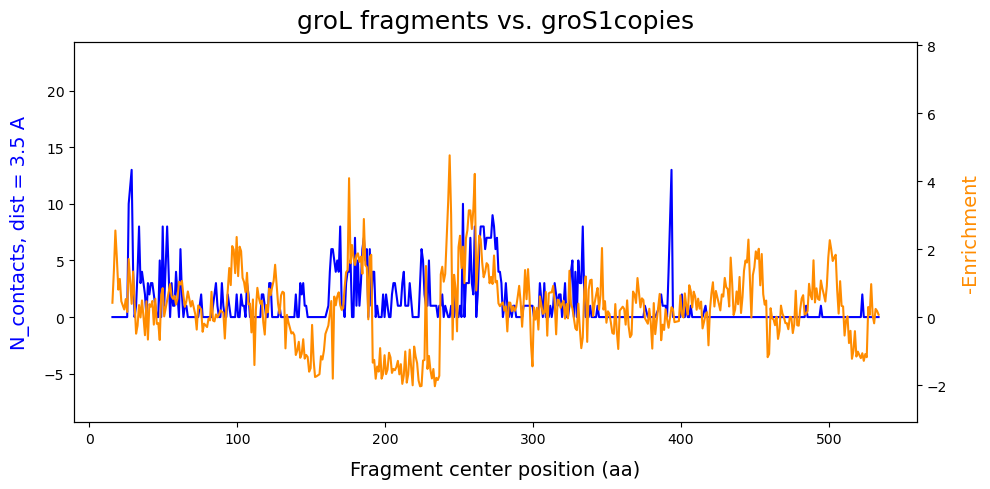

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__gyrA_frags_+_gyrA


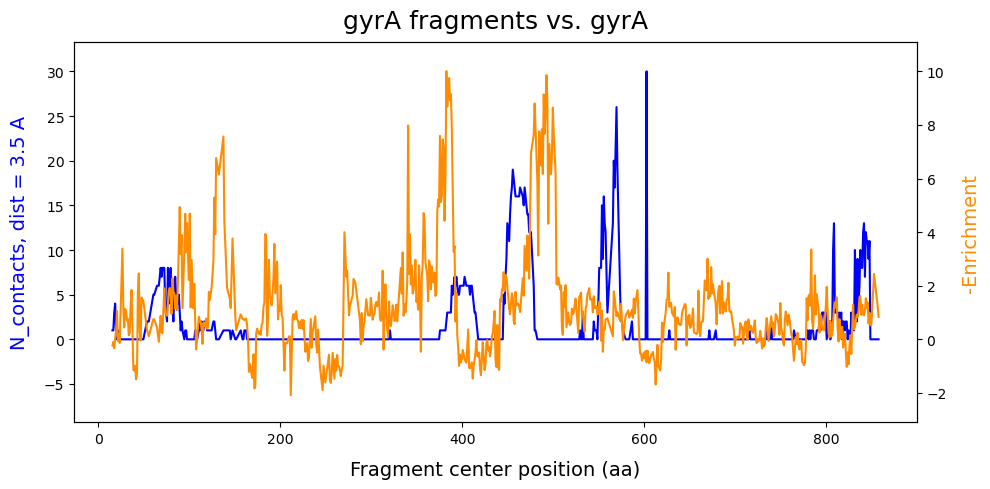

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__lptG_frags_+_lptG


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__rpIL_frags_+_rpIL


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ssb_frags_+_ssb


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ssb_frags_+_ssb2copies


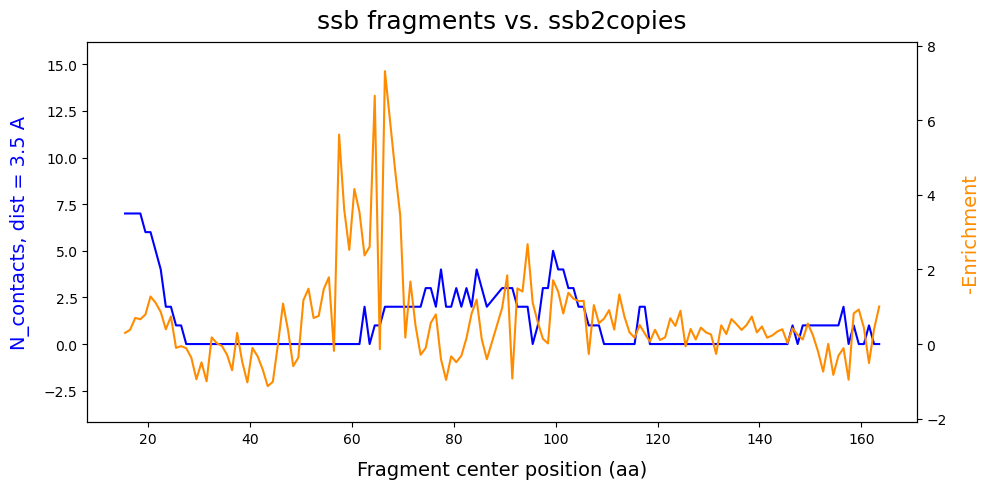

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ssb_frags_+_ssb4copies


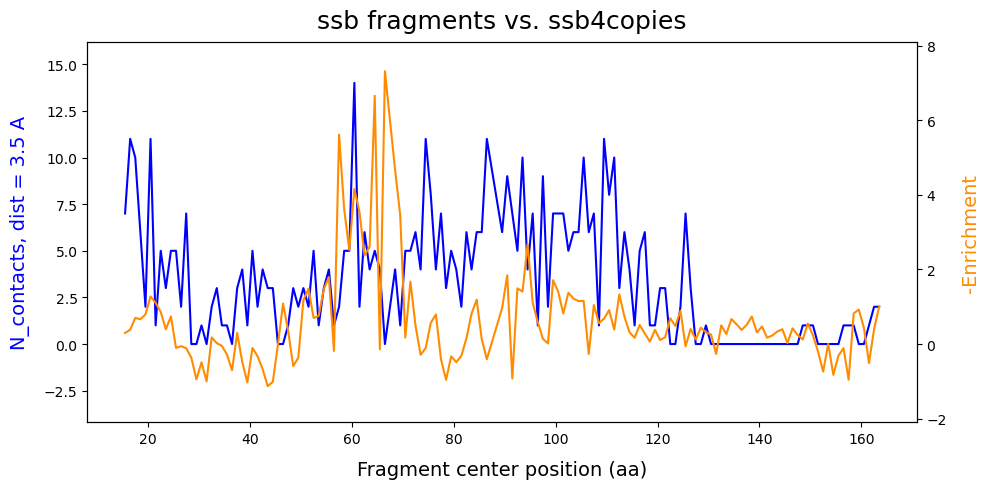

In [17]:
contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['folA', 'ftsZ', 'groL', 'groL', 'groL', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb', 'ssb']
protein_partners =\
['folA', 'ftsZ', 'groL', 'groL2copies', 'groS1copies', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb2copies', 'ssb4copies']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==14)]
    y1 = analysisDF['n_contacts']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter'] 
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange')
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('N_contacts'+', dist = '+str(contact_dist)+' A'),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_colabfold-pred-Ncontacts(' + str(contact_dist) + 'A)__'\
    + genes[i] + '_frags_+_'+ protein_partners[i]
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__folA_frags_+_folA


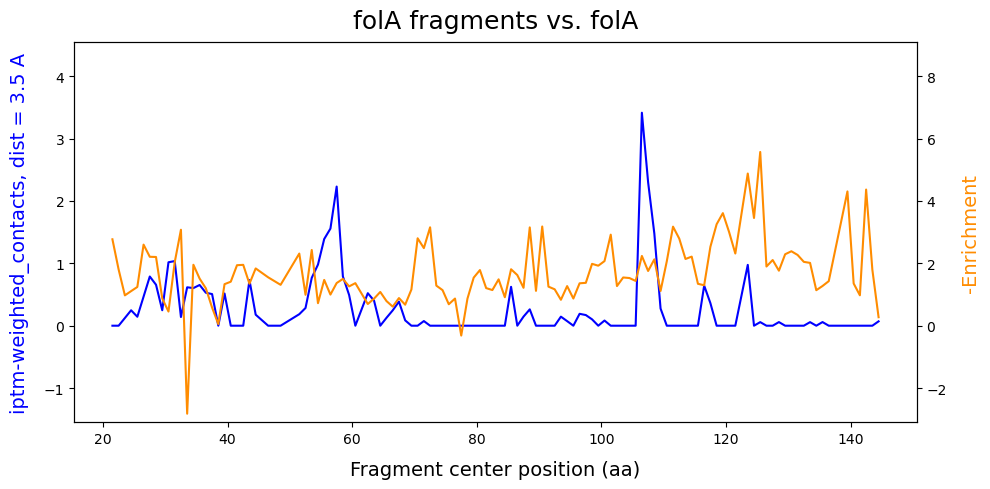

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ftsZ_frags_+_ftsZ


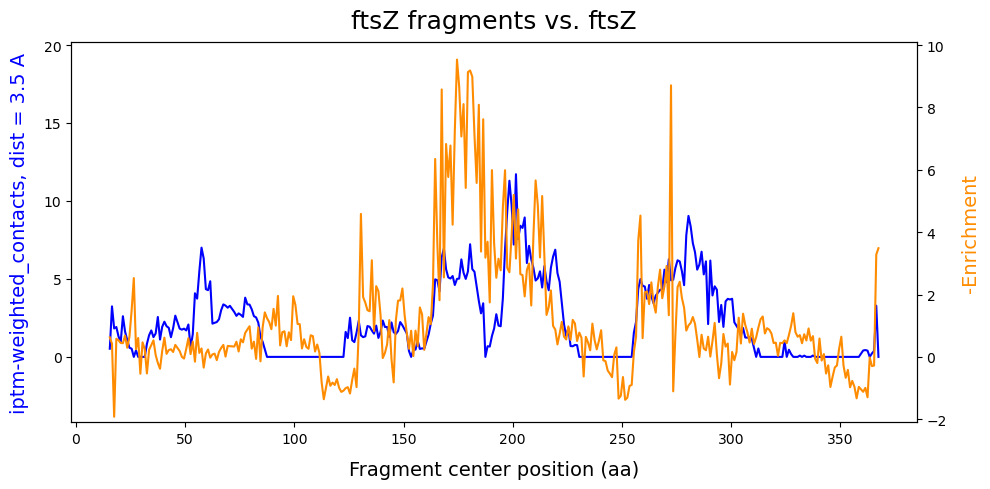

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__groL_frags_+_groL


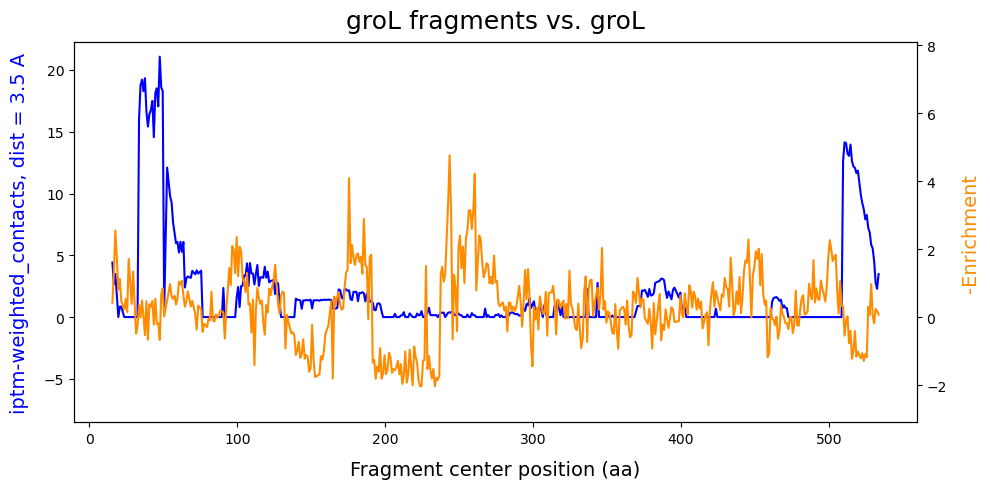

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__groL_frags_+_groL2copies


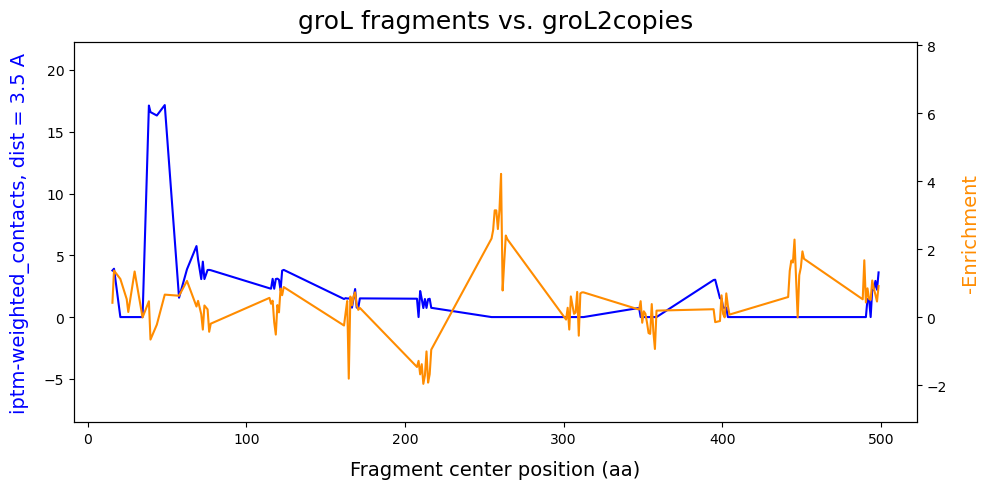

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__groL_frags_+_groS1copies


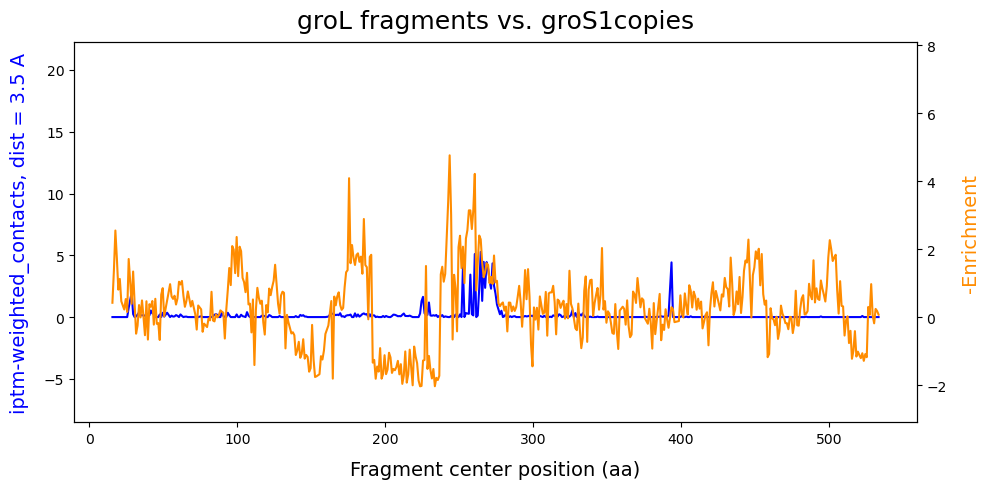

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__gyrA_frags_+_gyrA


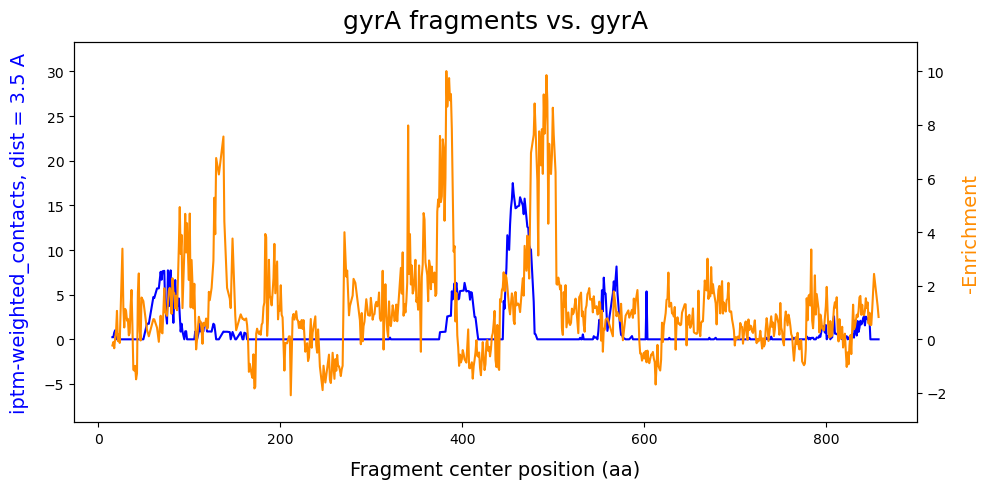

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__lptG_frags_+_lptG


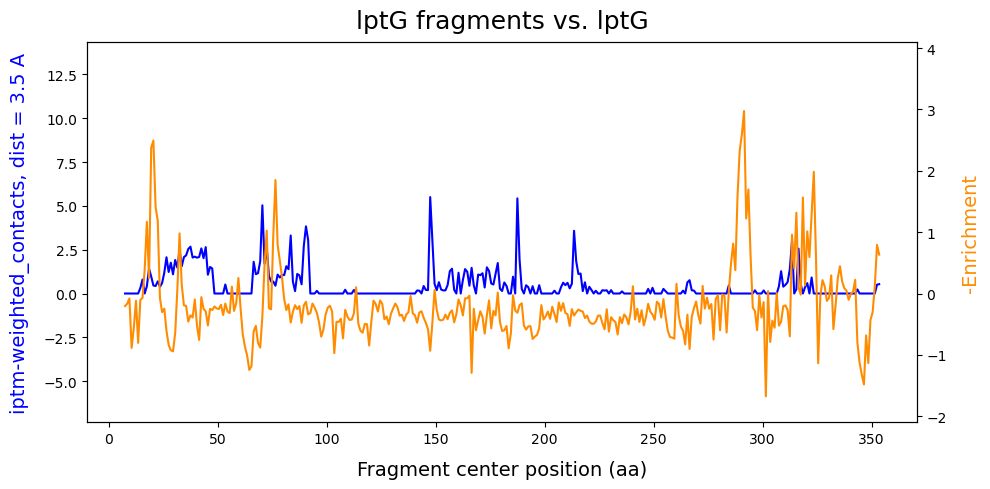

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__rpIL_frags_+_rpIL


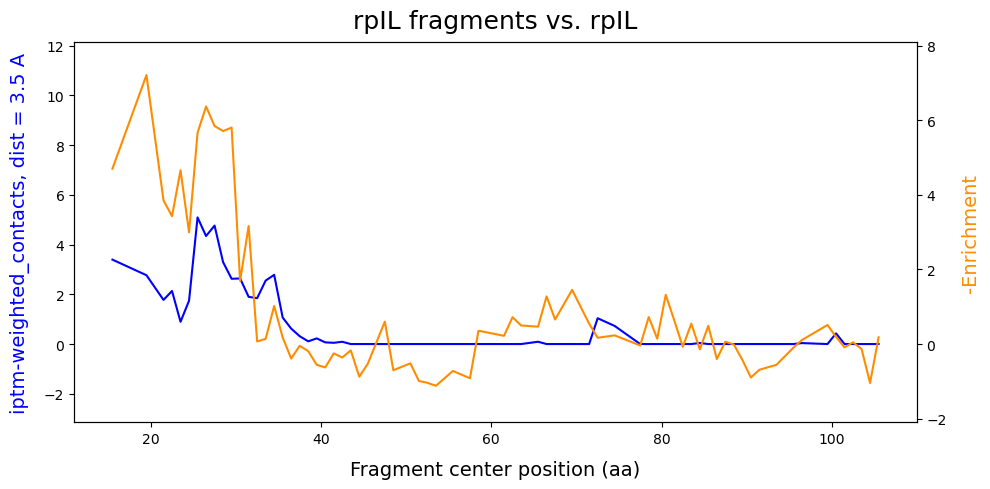

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ssb_frags_+_ssb


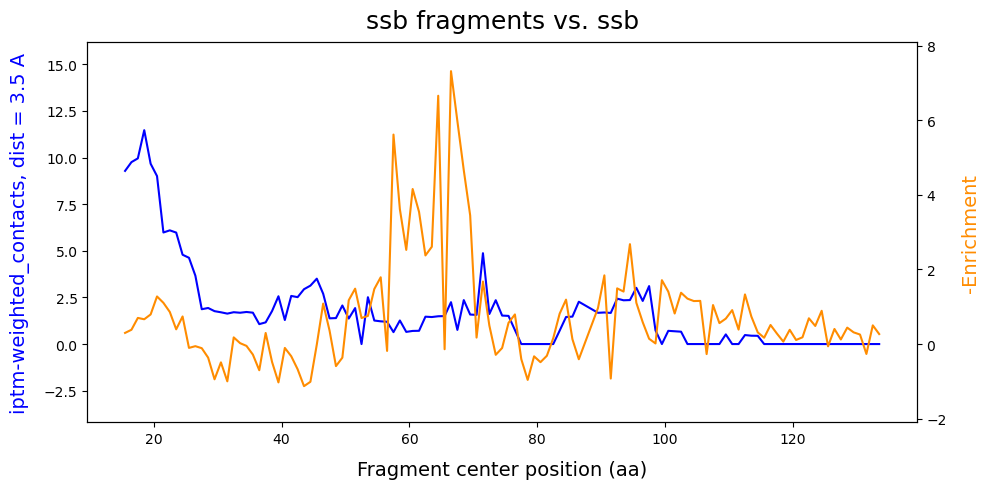

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ssb_frags_+_ssb2copies


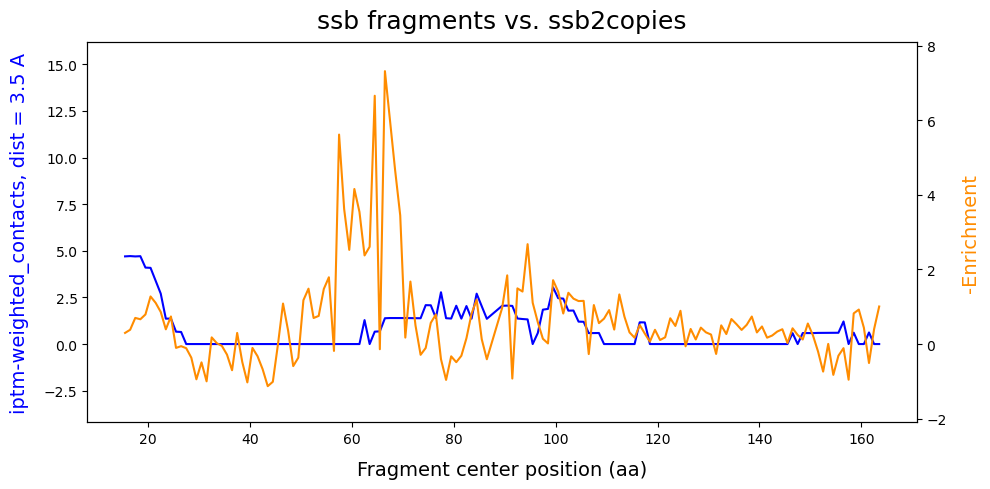

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ssb_frags_+_ssb4copies


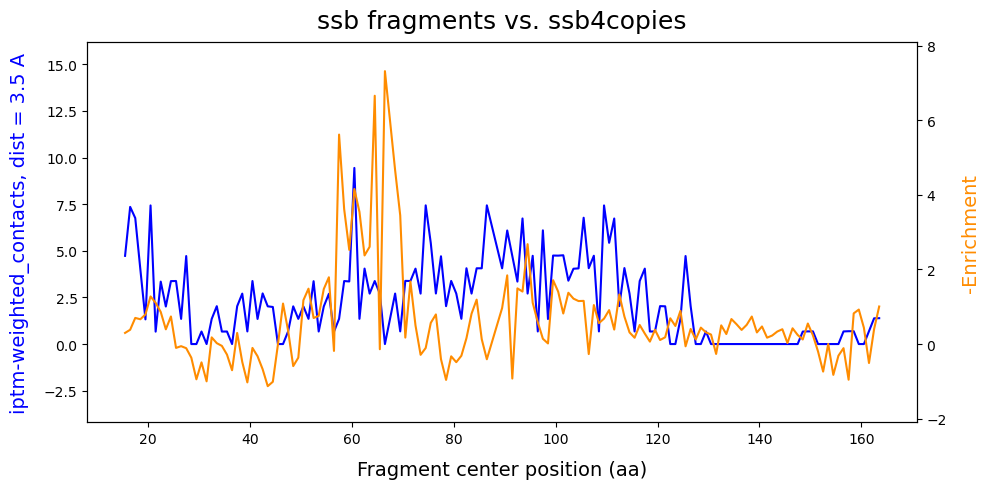

In [18]:
## as above, but now for iptm-weighted Ncontacts

contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['folA', 'ftsZ', 'groL', 'groL', 'groL', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb', 'ssb']
protein_partners =\
['folA', 'ftsZ', 'groL', 'groL2copies', 'groS1copies', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb2copies', 'ssb4copies']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==14)]
    y1 = analysisDF['weighted_contacts']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter'] 
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange')
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('iptm-weighted_contacts'+', dist = '+str(contact_dist)+' A'),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 0.5
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 2.75
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_colabfold-pred-weightedNcontacts(' + str(contact_dist) + 'A)__'\
    + genes[i] + '_frags_+_'+ protein_partners[i]
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__folA_frags_+_folA__with-EGFP-control


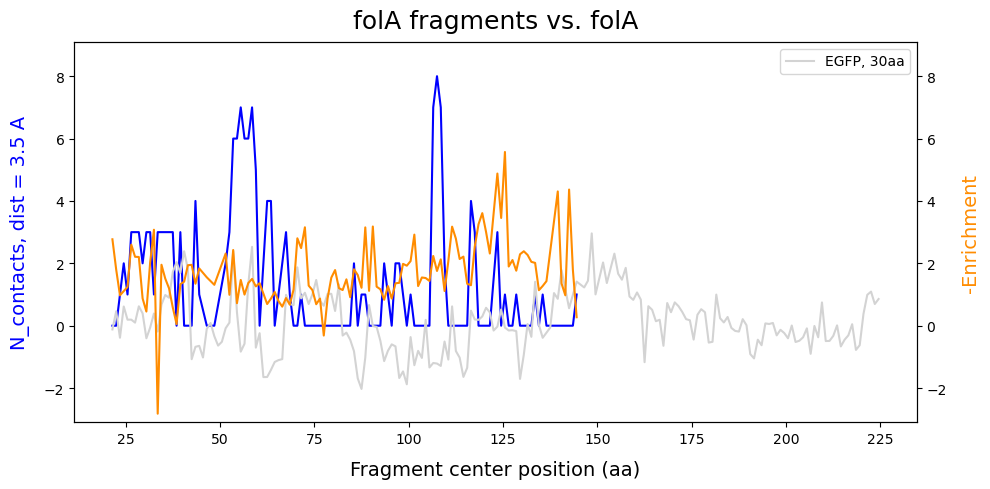

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ftsZ_frags_+_ftsZ__with-EGFP-control


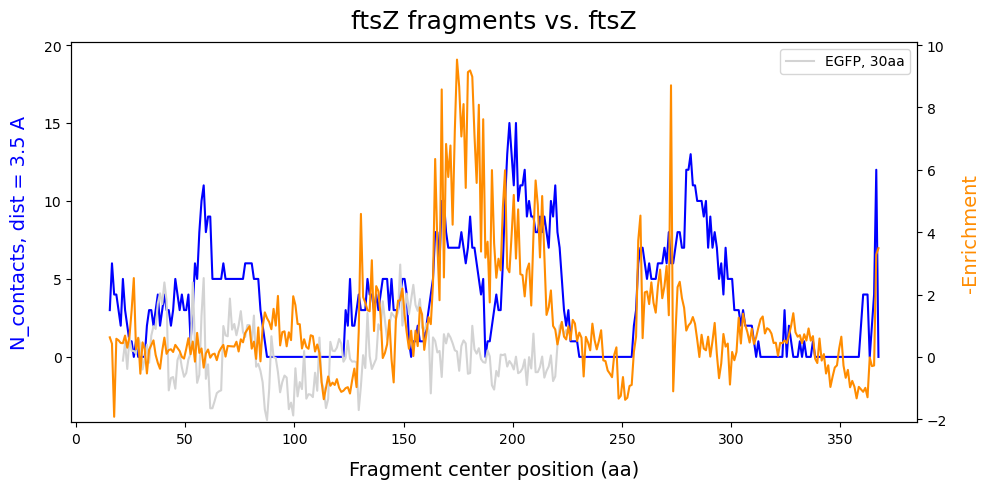

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__groL_frags_+_groL__with-EGFP-control


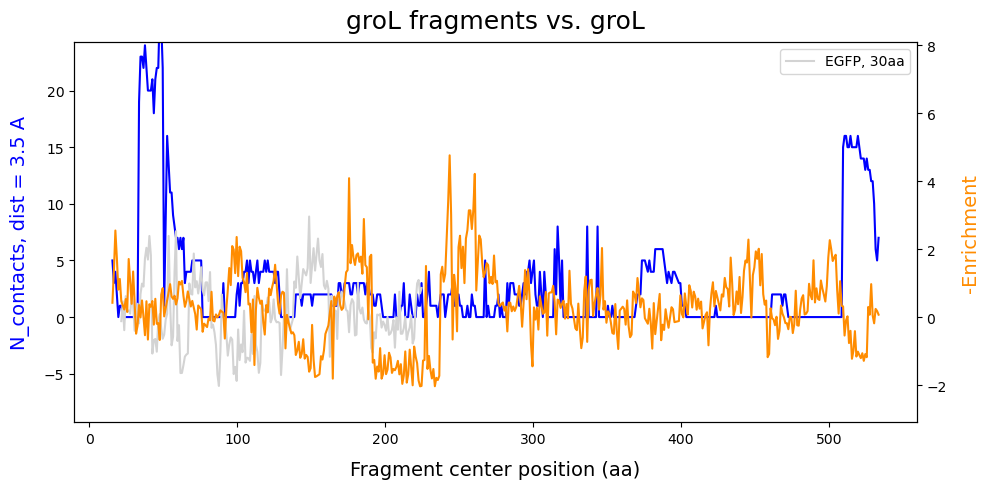

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__groL_frags_+_groL2copies__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__groL_frags_+_groS1copies__with-EGFP-control


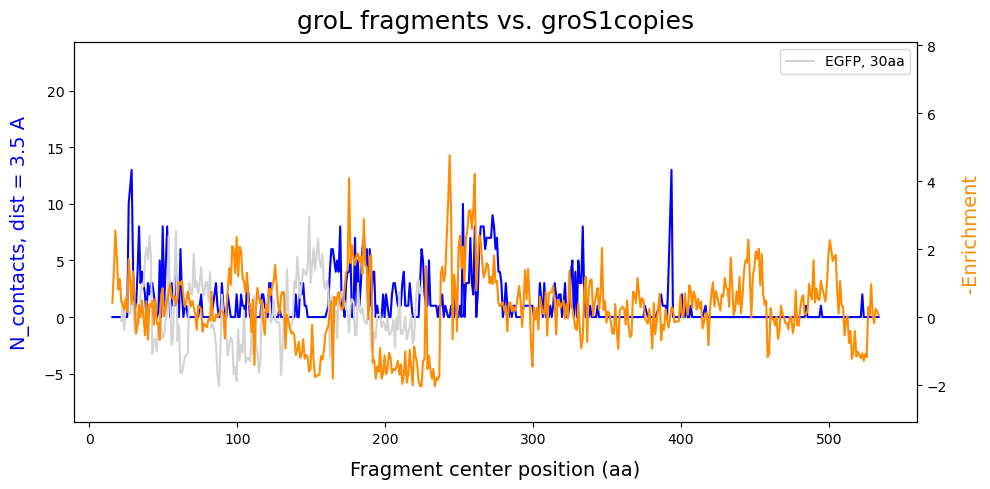

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__gyrA_frags_+_gyrA__with-EGFP-control


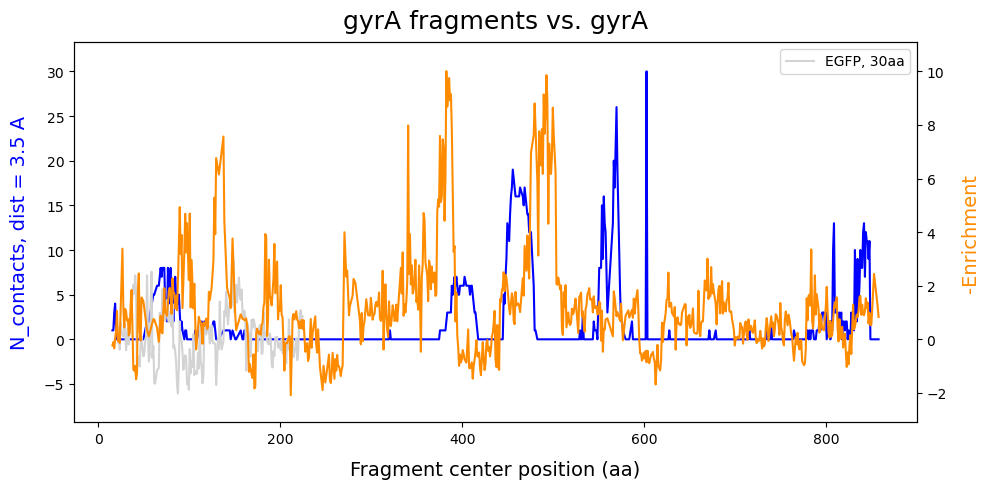

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__lptG_frags_+_lptG__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__rpIL_frags_+_rpIL__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ssb_frags_+_ssb__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ssb_frags_+_ssb2copies__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ssb_frags_+_ssb4copies__with-EGFP-control


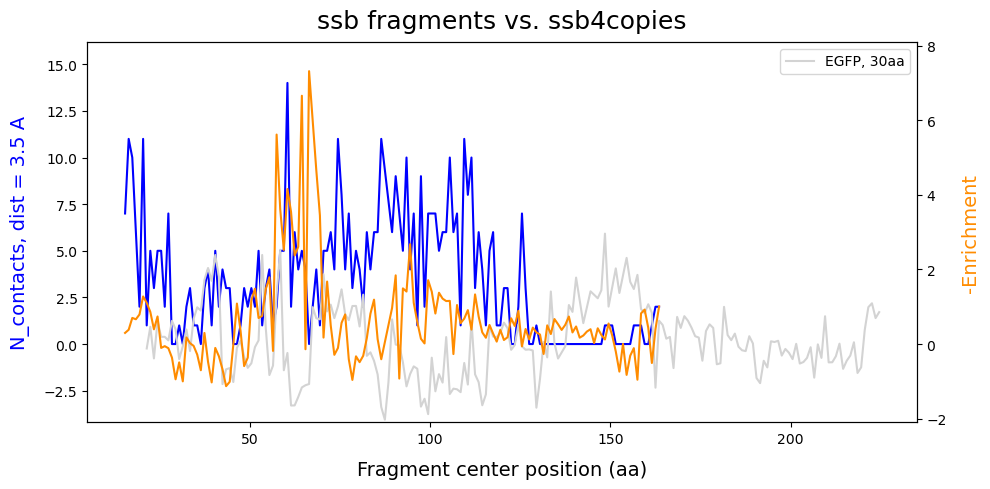

In [19]:
## as above for Ncontacts, now with EGFP enrichment (E) data overlaid for reference

contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['folA', 'ftsZ', 'groL', 'groL', 'groL', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb', 'ssb']
protein_partners =\
['folA', 'ftsZ', 'groL', 'groL2copies', 'groS1copies', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb2copies', 'ssb4copies']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==14)]
    y1 = analysisDF['n_contacts']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter']
    
    controlDF = inhibition_df[(inhibition_df['fragmented_protein']=='EGFP')]
    controlDF = controlDF[controlDF['aa.fragmentLength']==30]
    x3 = controlDF['aa.fragmentCenter'] 
    y3 = -controlDF['E = inhibitory effect (enrichment)']
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    if genes[i]!='lptG':
        line1, = ax2.plot(x3,y3,color='lightgrey')
        ax.legend([line1], ['EGFP, 30aa'])
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange')
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('N_contacts'+', dist = '+str(contact_dist)+' A'),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_colabfold-pred-Ncontacts(' + str(contact_dist) + 'A)__'\
    + genes[i] + '_frags_+_'+ protein_partners[i] + '__with-EGFP-control'
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()
    

    


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__folA_frags_+_folA__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ftsZ_frags_+_ftsZ__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__groL_frags_+_groL__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__groL_frags_+_groL2copies__with-EGFP-control


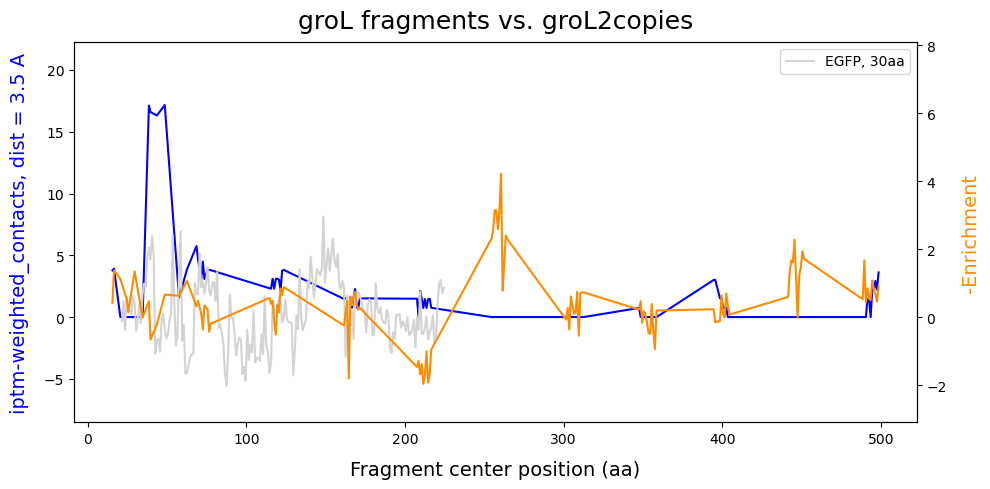

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__groL_frags_+_groS1copies__with-EGFP-control


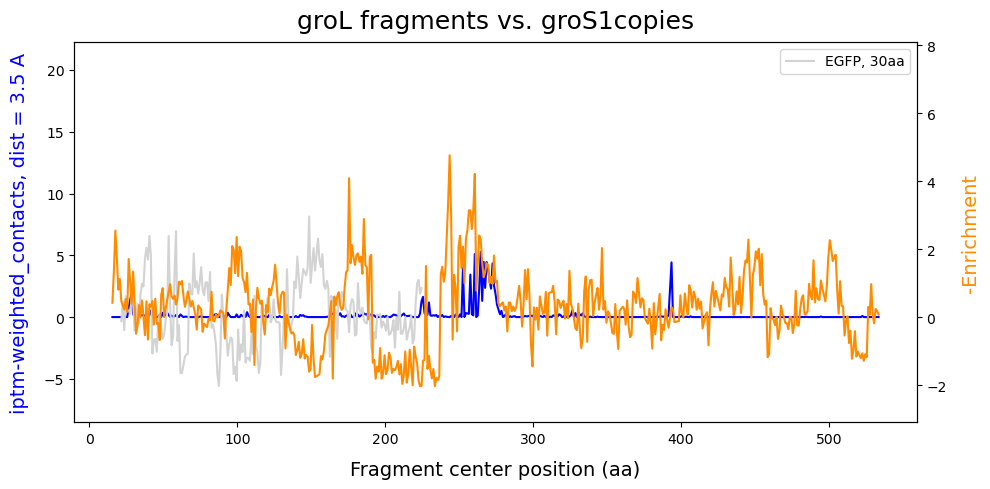

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__gyrA_frags_+_gyrA__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__lptG_frags_+_lptG__with-EGFP-control


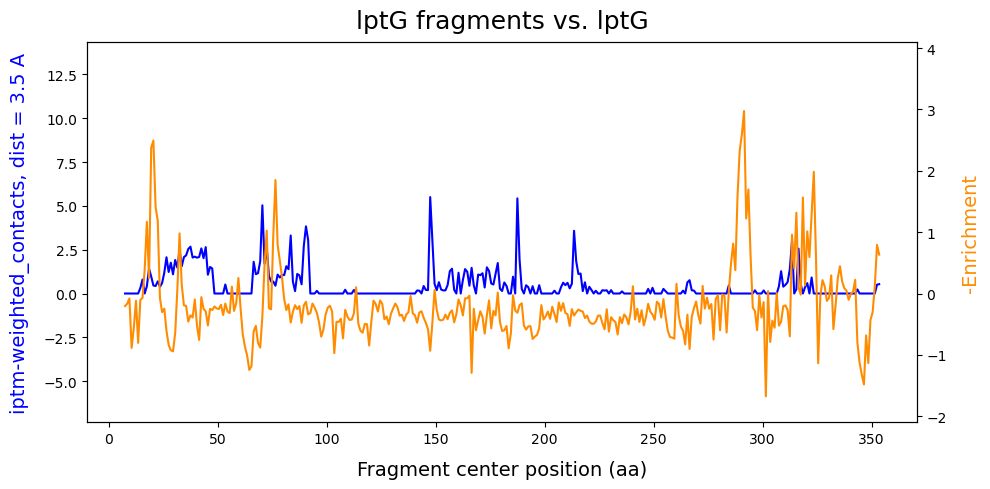

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__rpIL_frags_+_rpIL__with-EGFP-control


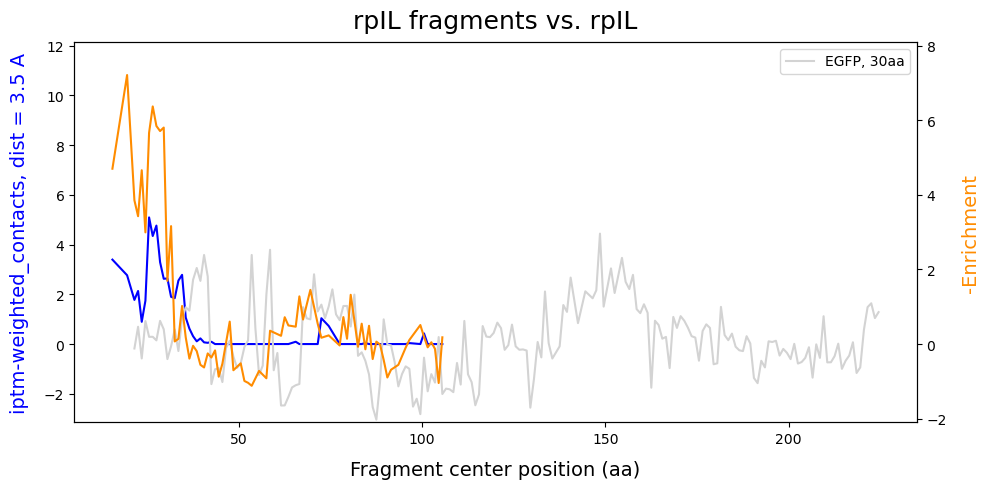

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ssb_frags_+_ssb__with-EGFP-control


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ssb_frags_+_ssb2copies__with-EGFP-control


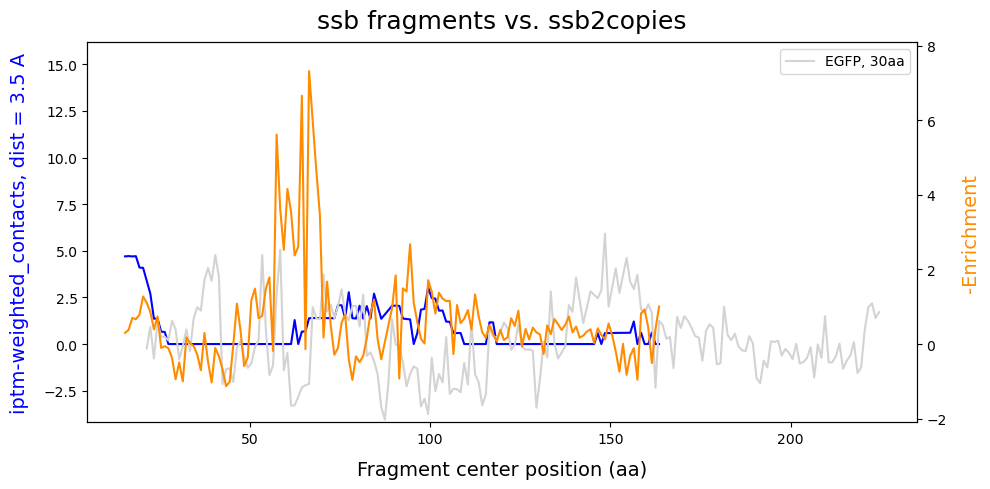

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-weightedNcontacts(3.5A)__ssb_frags_+_ssb4copies__with-EGFP-control


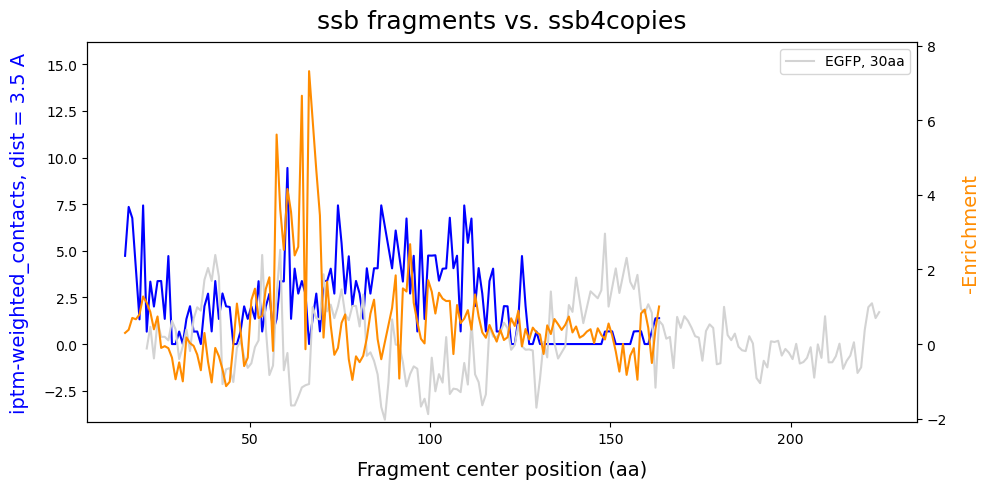

In [20]:
## as above for iptm-weighted Ncontacts, now with EGFP enrichment (E) data overlaid for reference

contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['folA', 'ftsZ', 'groL', 'groL', 'groL', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb', 'ssb']
protein_partners =\
['folA', 'ftsZ', 'groL', 'groL2copies', 'groS1copies', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb2copies', 'ssb4copies']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==14)]
    y1 = analysisDF['weighted_contacts']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter']
    
    controlDF = inhibition_df[(inhibition_df['fragmented_protein']=='EGFP')]
    controlDF = controlDF[controlDF['aa.fragmentLength']==30]
    x3 = controlDF['aa.fragmentCenter'] 
    y3 = -controlDF['E = inhibitory effect (enrichment)']
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    if genes[i]!='lptG':
        line1, = ax2.plot(x3,y3,color='lightgrey')
        ax.legend([line1], ['EGFP, 30aa'])
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange')
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('iptm-weighted_contacts'+', dist = '+str(contact_dist)+' A'),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 0.5
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 2.75
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_colabfold-pred-weightedNcontacts(' + str(contact_dist) + 'A)__'\
    + genes[i] + '_frags_+_'+ protein_partners[i] + '__with-EGFP-control'
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_colabfold-pred-Ncontacts(3.5A)__ftsZ_frags_+_ftsZ_pubFormat


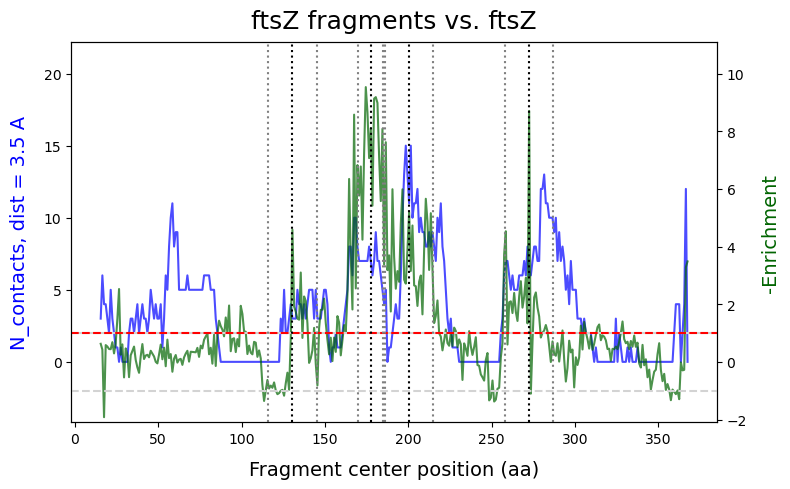

In [96]:
## as above, but "publication-format" figures (this version: for BPS 2023 talk)

contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['ftsZ'] #['folA', 'ftsZ', 'groL', 'groL', 'groL', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb', 'ssb']
protein_partners =\
['ftsZ'] #['folA', 'ftsZ', 'groL', 'groL2copies', 'groS1copies', 'gyrA', 'lptG', 'rpIL', 'ssb', 'ssb2copies', 'ssb4copies']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==14)]
    hlineMin = -1
    hlineMax = 1

    y1 = analysisDF['n_contacts']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter'] 
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    ax.plot(x1,y1,color=[0,0,1],linestyle='-',alpha=0.7)
    ax2.plot(x2,y2,color='darkgreen',linestyle='-',alpha=0.7)
    #ax.plot(x1,y1,color='blue',marker='o',markersize=5,linestyle='-',alpha=0.25)
    #ax2.plot(x2,y2,color='forestgreen',marker='o',markersize=5,linestyle='-',alpha=0.5)
    
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('N_contacts'+', dist = '+str(contact_dist)+' A'),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkgreen',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 11.1; f = 2
        vline_pk1center = 130.5 
        vline_pk2center = 177.5
        vline_pk3center = 200.5
        vline_pk4center = 272.5
        
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    
    plt.axhline(hlineMax,0,1,color='lightgrey',linestyle='-',alpha=1)
    plt.axhline(hlineMax,0,1,color='red',linestyle='--',alpha=1)
    plt.axhline(hlineMin,0,1,color='lightgrey',linestyle='--',alpha=1)
    
    plt.axvline(vline_pk1center,0,1,color='black',linestyle=':',alpha=1)
    plt.axvline((vline_pk1center - 14.5),0,1,color='grey',linestyle=':',alpha=1)
    plt.axvline((vline_pk1center + 14.5),0,1,color='grey',linestyle=':',alpha=1)
    
    plt.axvline(vline_pk2center,0,1,color='black',linestyle=':',alpha=1)
    plt.axvline((vline_pk2center - 7.5),0,1,color='grey',linestyle=':',alpha=1)
    plt.axvline((vline_pk2center + 7.5),0,1,color='grey',linestyle=':',alpha=1)
    
    plt.axvline(vline_pk3center,0,1,color='black',linestyle=':',alpha=1)
    plt.axvline((vline_pk3center - 14.5),0,1,color='grey',linestyle=':',alpha=1)
    plt.axvline((vline_pk3center + 14.5),0,1,color='grey',linestyle=':',alpha=1)
    
    plt.axvline(vline_pk4center,0,1,color='black',linestyle=':',alpha=1)
    plt.axvline((vline_pk4center - 14.5),0,1,color='grey',linestyle=':',alpha=1)
    plt.axvline((vline_pk4center + 14.5),0,1,color='grey',linestyle=':',alpha=1)
    
    
    
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_colabfold-pred-Ncontacts(' + str(contact_dist) + 'A)__'\
    + genes[i] + '_frags_+_'+ protein_partners[i] + '_pubFormat'
    /print figTitle
    fig.set_size_inches(8.0, 5.0)
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()
    
    

In [ ]:
/print 'test: above done running'

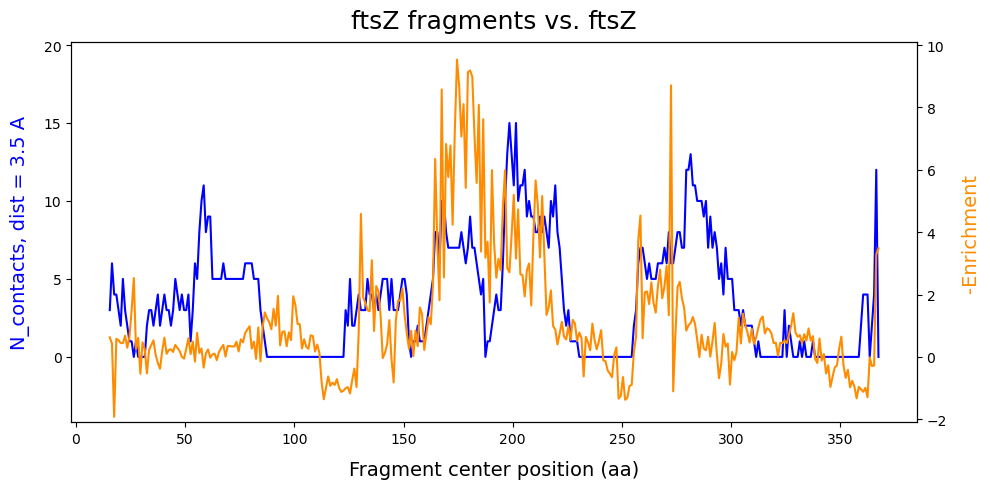

In [21]:

contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['ftsZ']
protein_partners = ['ftsZ']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df[(predVsExpt_df['fragmented_protein']==genes[i])&\
                               (predVsExpt_df['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df['aa.fragmentLength']==30)]
    y1 = analysisDF['n_contacts']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter']
    
    controlDF = inhibition_df[(inhibition_df['fragmented_protein']=='EGFP')]
    controlDF = controlDF[controlDF['aa.fragmentLength']==30]
    x3 = controlDF['aa.fragmentCenter'] 
    y3 = -controlDF['E = inhibitory effect (enrichment)']
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    #if genes[i]!='lptG':
    #    line1, = ax2.plot(x3,y3,color='lightgrey')
    #    ax.legend([line1], ['EGFP, 30aa'])
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange')
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('N_contacts'+', dist = '+str(contact_dist)+' A'),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    plt.tight_layout()
    plt.show()
    

In [22]:
gene = 'ftsZ'
partner = 'ftsZ' #gene
posMin = 0
posMax = 150

analysisDF = predVsExpt_df[predVsExpt_df['fragmented_protein']==gene]
analysisDF = analysisDF[analysisDF['protein_partner']==partner]
analysisDF = analysisDF[analysisDF['aa.fragmentLength']==30]
analysisDF = analysisDF[(analysisDF['aa.start']>=posMin)&(analysisDF['aa.start']<=posMax)]

analysisDF[['aa.start','aa.stop','aa.fragmentCenter','E = inhibitory effect (enrichment)','n_contacts','weighted_contacts']]


aa.start  aa.stop  aa.fragmentCenter  E = inhibitory effect (enrichment)  \
116         1       30               15.5                           -0.626857   
117         2       31               16.5                           -0.422974   
118         3       32               17.5                            1.919863   
119         4       33               18.5                           -0.581484   
120         5       34               19.5                           -0.532176   
121         6       35               20.5                           -0.445287   
122         7       36               21.5                           -0.439665   
123         8       37               22.5                           -0.683129   
124         9       38               23.5                           -0.293632   
125        10       39               24.5                           -0.646010   
126        11       40               25.5                           -1.493581   
127        12       41               26.5                           -2.527031   
128        13       42               27.5                           -0.246956   
129        14       43               28.5                           -0.606095   
130        15       44               29.5                            0.539981   
131        16       45               30.5                           -0.466906   
132        17       46               31.5                           -0.249778   
133        18       47               32.5                            0.531159   
134        19       48               33.5                           -0.228078   
135        20       49               34.5                           -0.379808   
136        21       50               35.5                           -0.529961   
137        22       51               36.5                           -0.063957   
138        23       52               37.5                            0.194171   
139        24       53               38.5                            0.380741   
140        25       54               39.5                           -0.191228   
141        26       55               40.5                           -0.617010   
142        27       56               41.5                           -0.098334   
143        28       57               42.5                           -0.219344   
144        29       58               43.5                           -0.244481   
145        30       59               44.5                           -0.157305   
146        31       60               45.5                           -0.384698   
147        33       62               47.5                           -0.187156   
148        34       63               48.5                           -0.001480   
149        35       64               49.5                            0.053262   
150        36       65               50.5                           -0.255231   
151        37       66               51.5                           -0.598377   
152        38       67               52.5                           -0.089261   
153        39       68               53.5                           -0.492045   
154        40       69               54.5                            0.152510   
155        41       70               55.5                           -0.770388   
156        42       71               56.5                           -0.128037   
157        43       72               57.5                           -0.270632   
158        44       73               58.5                            0.343036   
159        45       74               59.5                           -0.109899   
160        46       75               60.5                           -0.237443   
161        47       76               61.5                            0.025835   
162        48       77               62.5                           -0.079353   
163        49       78               63.5                           -0.104637   
164        50       79              

In [23]:
## function to calculate overlap between fragment peaks (or any two fragments) in two datasets
def calculate_overlap(x1, x2, fragLen, verbose=False):
    overlap = 0
    # where x1 = peak fragment center (or any fragment center) in dataset 1 (e.g., colabfold predicted Ncontacts); 
    # and likewise for x2, dataset 2 (e.g., inhibitory activity).
    
    # first calculate fragment starts and ends:
    x1_start = x1 - (fragLen-1)/2
    x1_end = x1 + (fragLen-1)/2
    x2_start = x2 - (fragLen-1)/2
    x2_end = x2 + (fragLen-1)/2
    
    if(verbose==True):
        /print x1_start
        /print x1_end
        /print
        /print x2_start
        /print x2_end
        /print
    
    # now calculate overlap:
    if(x1<=x2):
        overlap = x1_end - x2_start + 1
    elif(x1>x2):
        overlap = x2_end - x1_start + 1
    
    return overlap

In [24]:
# demonstration
x1 = 385.5
x2 = 385.5
fragLen = 30
overlap = calculate_overlap(x1, x2, fragLen)
/print overlap
/print

x1 = 272.5
x2 = 271.5
fragLen = 30
overlap = calculate_overlap(x1, x2, fragLen)
/print overlap
/print

x1 = 71.5
x2 = 66.5
fragLen = 30
overlap = calculate_overlap(x1, x2, fragLen)
/print overlap
/print

x1 = 66.5
x2 = 71.5
fragLen = 30
overlap = calculate_overlap(x1, x2, fragLen)
/print overlap
/print

x1 = 445.5
x2 = 464.5
fragLen = 30
overlap = calculate_overlap(x1, x2, fragLen)
/print overlap
/print


30.0

29.0

25.0

25.0

11.0



In [25]:
# troubleshooting for the below
df = predVsExpt_df
proteins_fragmented_list = ['ftsZ']
protein_targets_list = ['ftsZ']
variable = 'E = inhibitory effect (enrichment)'
fragLen=30

for i in range(0,len(proteins_fragmented_list)):
    #/print proteins_fragmented_list[i]
    #/print protein_targets_list[i]
    fragmented_protein = proteins_fragmented_list[i]
    target_protein = protein_targets_list[i]
    analysisDF = df[(df['fragmented_protein']==fragmented_protein)&\
                   (df['protein_partner']==target_protein)&\
                       (df['aa.fragmentLength']==fragLen)]
    #/print analysisDF.head(5)
    frag_init = min(analysisDF['aa.fragmentCenter'])
    frag_end = max(analysisDF['aa.fragmentCenter'])
    #/print frag_init
    #/print frag_end
    for x in np.arange(frag_init,frag_end+1):
        calcDF = analysisDF[analysisDF['aa.fragmentCenter']==x]
        /print x
        try:
            /print calcDF[variable].iloc[0]
            #/print 'hello'
        except:
            pass
            #/print 'error'

15.5
-0.626857385
16.5
-0.422973662
17.5
1.919863394
18.5
-0.581484183
19.5
-0.532175531
20.5
-0.445287116
21.5
-0.439664847
22.5
-0.68312907
23.5
-0.293631876
24.5
-0.646010252
25.5
-1.493581143
26.5
-2.527030596
27.5
-0.246956245
28.5
-0.606095466
29.5
0.539981132
30.5
-0.466906263
31.5
-0.249777597
32.5
0.531159078
33.5
-0.228078388
34.5
-0.379807963
35.5
-0.529961086
36.5
-0.063957249
37.5
0.194171324
38.5
0.380740507
39.5
-0.191228411
40.5
-0.617010032
41.5
-0.098333698
42.5
-0.219343752
43.5
-0.244481403
44.5
-0.157305223
45.5
-0.384697801
46.5
47.5
-0.187155858
48.5
-0.001480132
49.5
0.05326246
50.5
-0.25523054
51.5
-0.598377377
52.5
-0.089261492
53.5
-0.492044579
54.5
0.152510152
55.5
-0.770387846
56.5
-0.128037448
57.5
-0.270632374
58.5
0.343036288
59.5
-0.109899449
60.5
-0.237443319
61.5
0.025834664
62.5
-0.079353359
63.5
-0.104637304
64.5
0.104743434
65.5
-0.156155171
66.5
-0.286799295
67.5
-0.384128573
68.5
-0.008753024
69.5
-0.351133748
70.5
-0.34331197
71.5
72.5
-0.331468

In [26]:
list1 = []
if list1==[]:
    /print 'a'
list1.append(1)
/print list1

a
[1]


In [38]:
## function to find fragment peaks in a dataset given a list of proteins and a threshold 
## * (work in progress!) *

def find_peaks(variable, var_threshold, proteins_fragmented_list, protein_targets_list,\
               df=predVsExpt_df, fragLen=30, verbose=False):
    # where df = dataset dataframe -- * the merged dataframe with all data * is assumed currently
    # and proteinsList is a list of proteins (['a','b','c',...]) of interest to find peaks for
    # variable is the dependent variable to find peaks in (indep variable is always fragment position in source protein sequence)
    fragmented_protein_name_list_short = []
    target_protein_name_list_short = []
    peak_starts_list = []
    peak_ends_list = []
    
    for i in range(0,len(proteins_fragmented_list)):
        
        fragmented_protein_name_list_long = []
        target_protein_name_list_long = []
        isPeak_bool = []
        fragment_centers = []
        #testVal = 0
        
        fragmented_protein = proteins_fragmented_list[i]
        target_protein = protein_targets_list[i]
        analysisDF = df[(df['fragmented_protein']==fragmented_protein)&\
                   (df['protein_partner']==target_protein)&\
                       (df['aa.fragmentLength']==fragLen)]
        if(verbose==True):
            /print 
            #/print analysisDF.head(1)
        frag_init = min(analysisDF['aa.fragmentCenter'])
        frag_end = max(analysisDF['aa.fragmentCenter'])
        
        for x in np.arange(frag_init,frag_end+1):
            if(verbose==True):
                /print ''
                #/print testVal
                /print x
                /print isPeak_bool
                /print peak_starts_list
            fragment_centers.append(x)
            fragmented_protein_name_list_long.append(fragmented_protein)
            target_protein_name_list_long.append(target_protein)
            calcDF = analysisDF[analysisDF['aa.fragmentCenter']==x]
            if(verbose==True):
                /print calcDF[variable]
                if((calcDF[variable]).empty):
                    /print 'empty'
            if x==frag_init:
                if(verbose==True):
                    /print 'first_fragment' 
                try:
                    if(calcDF[variable].iloc[0]>=var_threshold):
                        if(verbose==True):
                            /print 'case1' 
                        peak_start_fragCenter = x
                        peak_starts_list.append(peak_start_fragCenter)
                        fragmented_protein_name_list_short.append(fragmented_protein)
                        target_protein_name_list_short.append(target_protein)
                        isPeak_bool.append(1)
                    else:
                        if(verbose==True):
                            /print 'case2'
                        isPeak_bool.append(0)
                        if(verbose==True):
                            /print isPeak_bool
                except:
                    #testVal = 1
                    pass
                if((calcDF[variable]).empty):
                    if(verbose==True):
                        /print 'exception' 
                    isPeak_bool.append(0)
            elif x>frag_init:
                try:
                    if(calcDF[variable].iloc[0]>=var_threshold):
                        if(verbose==True):
                            /print 'case1' 
                        isPeak_bool.append(1)
                        if(isPeak_bool[-1]==0):
                            peak_start_fragCenter = x
                            peak_starts_list.append(peak_start_fragCenter)
                            fragmented_protein_name_list_short.append(fragmented_protein)
                            target_protein_name_list_short.append(target_protein)
                    else:
                        if(verbose==True):
                            /print 'case2' 
                        isPeak_bool.append(0)
                        if(isPeak_bool[-1]==1):
                            peak_end_fragCenter = x
                            peak_ends_list.append(peak_end_fragCenter)
                            fragmented_protein_name_list_short.append(fragmented_protein)
                            target_protein_name_list_short.append(target_protein)
                except:
                    pass
                if((calcDF[variable]).empty):
                    if(verbose==True):
                        /print 'exception' 
                    previousValue = isPeak_bool[-1]
                    isPeak_bool.append(previousValue)
            
    peakStartColName = 'peak_start__'+variable+'>'+str(var_threshold)+'_fragLen='+str(fragLen)
    peakEndColName = 'peak_end__'+variable+'>'+str(var_threshold)+'_fragLen='+str(fragLen)
    peaks_df = pd.DataFrame(list(zip(fragmented_protein_name_list_short,\
                                     target_protein_name_list_short,\
                                    peak_starts_list, peak_ends_list)),\
                            columns=['fragmented_protein','protein_partner',peakStartColName,peakEndColName])
    
    isPeakColName = 'is_peak__'+variable+'>'+str(var_threshold)+'_fragLen='+str(fragLen)
    isPeak_df = pd.DataFrame(list(zip(fragmented_protein_name_list_long,\
                                     target_protein_name_list_long,\
                                        fragment_centers, isPeak_bool)),\
                            columns=['fragmented_protein','protein_partner','aa.fragmentCenter',isPeakColName])
    
    DFs_list = [peaks_df, isPeak_df]
    
    return DFs_list
        

In [39]:
predVsExpt_df['-Enrichment'] = -predVsExpt_df['E = inhibitory effect (enrichment)']

In [40]:
## demonstrating findPeaks function

variable = '-Enrichment'
var_threshold = 1.5
proteins_fragmented_list = ['ftsZ']
protein_targets_list = ['ftsZ']

peak_DFs_list = find_peaks(variable, var_threshold, proteins_fragmented_list, protein_targets_list, verbose=True)

peaks_df = peak_DFs_list[0]

isPeak_df = peak_DFs_list[1]



15.5
[]
[]
116    0.626857
Name: -Enrichment, dtype: float64
first_fragment
case2
[0]

16.5
[0]
[]
117    0.422974
Name: -Enrichment, dtype: float64
case2

17.5
[0, 0]
[]
118   -1.919863
Name: -Enrichment, dtype: float64
case2

18.5
[0, 0, 0]
[]
119    0.581484
Name: -Enrichment, dtype: float64
case2

19.5
[0, 0, 0, 0]
[]
120    0.532176
Name: -Enrichment, dtype: float64
case2

20.5
[0, 0, 0, 0, 0]
[]
121    0.445287
Name: -Enrichment, dtype: float64
case2

21.5
[0, 0, 0, 0, 0, 0]
[]
122    0.439665
Name: -Enrichment, dtype: float64
case2

22.5
[0, 0, 0, 0, 0, 0, 0]
[]
123    0.683129
Name: -Enrichment, dtype: float64
case2

23.5
[0, 0, 0, 0, 0, 0, 0, 0]
[]
124    0.293632
Name: -Enrichment, dtype: float64
case2

24.5
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
125    0.64601
Name: -Enrichment, dtype: float64
case2

25.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
126    1.493581
Name: -Enrichment, dtype: float64
case2

26.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
127    2.527031
Name: -Enrichment, dtype: flo

313    1.592957
Name: -Enrichment, dtype: float64
case1

217.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
[]
314    2.130772
Name: -Enrichment, dtype: float64
case1

218.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [41]:
peaks_df.head(10)

Empty DataFrame
Columns: [fragmented_protein, protein_partner, peak_start__-Enrichment>1.5_fragLen=30, peak_end__-Enrichment>1.5_fragLen=30]
Index: []

In [42]:
isPeak_df

fragmented_protein protein_partner  aa.fragmentCenter  \
0                 ftsZ            ftsZ               15.5   
1                 ftsZ            ftsZ               16.5   
2                 ftsZ            ftsZ               17.5   
3                 ftsZ            ftsZ               18.5   
4                 ftsZ            ftsZ               19.5   
..                 ...             ...                ...   
348               ftsZ            ftsZ              363.5   
349               ftsZ            ftsZ              364.5   
350               ftsZ            ftsZ              365.5   
351               ftsZ            ftsZ              366.5   
352               ftsZ            ftsZ              367.5   

     is_peak__-Enrichment>1.5_fragLen=30  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  
..                                   ...  
348                                    0  
349                                    0  
350                                    0  
351                                    1  
352                                    1  

[353 rows x 4 columns]

In [43]:
predVsExpt_df_plus_peaks =\
predVsExpt_df.merge(isPeak_df, how='inner', on=["fragmented_protein","protein_partner","aa.fragmentCenter"])

predVsExpt_df_plus_peaks.head(10)


fragment_name  aa.start  aa.fragmentCenter  aa.stop      iptm  \
0   FtsZ_10-316_FtsZ_1-30         1               15.5       30  0.174501   
1   FtsZ_10-316_FtsZ_2-31         2               16.5       31  0.539908   
2   FtsZ_10-316_FtsZ_3-32         3               17.5       32  0.456218   
3   FtsZ_10-316_FtsZ_4-33         4               18.5       33  0.479033   
4   FtsZ_10-316_FtsZ_5-34         5               19.5       34  0.436050   
5   FtsZ_10-316_FtsZ_6-35         6               20.5       35  0.480671   
6   FtsZ_10-316_FtsZ_7-36         7               21.5       36  0.521556   
7   FtsZ_10-316_FtsZ_8-37         8               22.5       37  0.539845   
8   FtsZ_10-316_FtsZ_9-38         9               23.5       38  0.535189   
9  FtsZ_10-316_FtsZ_10-39        10               24.5       39  0.585119   

       plddt  n_contacts  \
0  72.288333           3   
1  82.679000           6   
2  80.927667           4   
3  83.006667           4   
4  82.282667           3   
5  84.267667           2   
6  85.120000           5   
7  87.488667           3   
8  89.208333           2   
9  91.422333           1   

                                                                                                                                                                    path  \
0    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_1-30/output/FtsZ_10-316_FtsZ_1-30_unrelaxed_rank_1_model_5.pdb   
1    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_2-31/output/FtsZ_10-316_FtsZ_2-31_unrelaxed_rank_1_model_5.pdb   
2    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_3-32/output/FtsZ_10-316_FtsZ_3-32_unrelaxed_rank_1_model_5.pdb   
3    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_4-33/output/FtsZ_10-316_FtsZ_4-33_unrelaxed_rank_1_model_5.pdb   
4    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_5-34/output/FtsZ_10-316_FtsZ_5-34_unrelaxed_rank_1_model_5.pdb   
5    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_6-35/output/FtsZ_10-316_FtsZ_6-35_unrelaxed_rank_1_model_5.pdb   
6    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_7-36/output/FtsZ_10-316_FtsZ_7-36_unrelaxed_rank_1_model_5.pdb   
7    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_8-37/output/FtsZ_10-316_FtsZ_8-37_unrelaxed_rank_1_model_5.pdb   
8    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_9-38/output/FtsZ_10-316_FtsZ_9-38_unrelaxed_rank_1_model_5.pdb   
9  /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_10-39/output/FtsZ_10-316_FtsZ_10-39_unrelaxed_rank_1_model_5.pdb   

  _merge  weighted_contacts gene_x          condition protein_partner  \
0   both           0.523504   fstZ  30aa_monomer_fstZ            ftsZ   
1   both           3.239451   fstZ  30aa_monomer_fstZ            ftsZ   
2   both           1.824871   fstZ  30aa_monomer_fstZ            ftsZ   
3   both           1.916134   fstZ  30aa_monomer_fstZ            ftsZ   
4   both           1.308149   fstZ  30aa_monomer_fstZ            ftsZ   
5   both           0.961342   fstZ  30aa_monomer_fstZ            ftsZ   
6   both           2.607782   fstZ  30aa_monomer_fstZ            ftsZ   
7   both           1.619534   fstZ  30aa_monomer_fstZ            ftsZ   
8   both           1.070378   fstZ  30aa_monomer_fstZ            ftsZ   
9   both           0.585119   fstZ  30aa_monomer_fstZ            ftsZ   

   protein_partner_aa.start  protein_partner_aa.stop fragmented_protein  \
0                        10                      316               ftsZ   
1       

In [44]:
## demonstrating findPeaks function

variable = '-Enrichment'
#var_threshold = 1.5
var_threshold = 2.0
proteins_fragmented_list = ['ftsZ']
protein_targets_list = ['ftsZ']

peak_DFs_list = find_peaks(variable, var_threshold, proteins_fragmented_list, protein_targets_list, verbose=True)

peaks_df = peak_DFs_list[0]

isPeak_df = peak_DFs_list[1]



15.5
[]
[]
116    0.626857
Name: -Enrichment, dtype: float64
first_fragment
case2
[0]

16.5
[0]
[]
117    0.422974
Name: -Enrichment, dtype: float64
case2

17.5
[0, 0]
[]
118   -1.919863
Name: -Enrichment, dtype: float64
case2

18.5
[0, 0, 0]
[]
119    0.581484
Name: -Enrichment, dtype: float64
case2

19.5
[0, 0, 0, 0]
[]
120    0.532176
Name: -Enrichment, dtype: float64
case2

20.5
[0, 0, 0, 0, 0]
[]
121    0.445287
Name: -Enrichment, dtype: float64
case2

21.5
[0, 0, 0, 0, 0, 0]
[]
122    0.439665
Name: -Enrichment, dtype: float64
case2

22.5
[0, 0, 0, 0, 0, 0, 0]
[]
123    0.683129
Name: -Enrichment, dtype: float64
case2

23.5
[0, 0, 0, 0, 0, 0, 0, 0]
[]
124    0.293632
Name: -Enrichment, dtype: float64
case2

24.5
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
125    0.64601
Name: -Enrichment, dtype: float64
case2

25.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
126    1.493581
Name: -Enrichment, dtype: float64
case2

26.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
127    2.527031
Name: -Enrichment, dtype: flo

414    0.87281
Name: -Enrichment, dtype: float64
case2

318.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
415    0.747219
Name: -En

In [45]:
predVsExpt_df_plus_peaks =\
predVsExpt_df_plus_peaks.merge(isPeak_df, how='inner', on=["fragmented_protein","protein_partner","aa.fragmentCenter"])

predVsExpt_df_plus_peaks.head(10)

fragment_name  aa.start  aa.fragmentCenter  aa.stop      iptm  \
0   FtsZ_10-316_FtsZ_1-30         1               15.5       30  0.174501   
1   FtsZ_10-316_FtsZ_2-31         2               16.5       31  0.539908   
2   FtsZ_10-316_FtsZ_3-32         3               17.5       32  0.456218   
3   FtsZ_10-316_FtsZ_4-33         4               18.5       33  0.479033   
4   FtsZ_10-316_FtsZ_5-34         5               19.5       34  0.436050   
5   FtsZ_10-316_FtsZ_6-35         6               20.5       35  0.480671   
6   FtsZ_10-316_FtsZ_7-36         7               21.5       36  0.521556   
7   FtsZ_10-316_FtsZ_8-37         8               22.5       37  0.539845   
8   FtsZ_10-316_FtsZ_9-38         9               23.5       38  0.535189   
9  FtsZ_10-316_FtsZ_10-39        10               24.5       39  0.585119   

       plddt  n_contacts  \
0  72.288333           3   
1  82.679000           6   
2  80.927667           4   
3  83.006667           4   
4  82.282667           3   
5  84.267667           2   
6  85.120000           5   
7  87.488667           3   
8  89.208333           2   
9  91.422333           1   

                                                                                                                                                                    path  \
0    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_1-30/output/FtsZ_10-316_FtsZ_1-30_unrelaxed_rank_1_model_5.pdb   
1    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_2-31/output/FtsZ_10-316_FtsZ_2-31_unrelaxed_rank_1_model_5.pdb   
2    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_3-32/output/FtsZ_10-316_FtsZ_3-32_unrelaxed_rank_1_model_5.pdb   
3    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_4-33/output/FtsZ_10-316_FtsZ_4-33_unrelaxed_rank_1_model_5.pdb   
4    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_5-34/output/FtsZ_10-316_FtsZ_5-34_unrelaxed_rank_1_model_5.pdb   
5    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_6-35/output/FtsZ_10-316_FtsZ_6-35_unrelaxed_rank_1_model_5.pdb   
6    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_7-36/output/FtsZ_10-316_FtsZ_7-36_unrelaxed_rank_1_model_5.pdb   
7    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_8-37/output/FtsZ_10-316_FtsZ_8-37_unrelaxed_rank_1_model_5.pdb   
8    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_9-38/output/FtsZ_10-316_FtsZ_9-38_unrelaxed_rank_1_model_5.pdb   
9  /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_10-39/output/FtsZ_10-316_FtsZ_10-39_unrelaxed_rank_1_model_5.pdb   

  _merge  weighted_contacts gene_x          condition protein_partner  \
0   both           0.523504   fstZ  30aa_monomer_fstZ            ftsZ   
1   both           3.239451   fstZ  30aa_monomer_fstZ            ftsZ   
2   both           1.824871   fstZ  30aa_monomer_fstZ            ftsZ   
3   both           1.916134   fstZ  30aa_monomer_fstZ            ftsZ   
4   both           1.308149   fstZ  30aa_monomer_fstZ            ftsZ   
5   both           0.961342   fstZ  30aa_monomer_fstZ            ftsZ   
6   both           2.607782   fstZ  30aa_monomer_fstZ            ftsZ   
7   both           1.619534   fstZ  30aa_monomer_fstZ            ftsZ   
8   both           1.070378   fstZ  30aa_monomer_fstZ            ftsZ   
9   both           0.585119   fstZ  30aa_monomer_fstZ            ftsZ   

   protein_partner_aa.start  protein_partner_aa.stop fragmented_protein  \
0                        10                      316               ftsZ   
1       

In [48]:
## demonstrating findPeaks function

variable = '-Enrichment'
#var_threshold = 1.5
#var_threshold = 2.0
var_threshold = 1.0
proteins_fragmented_list = ['ftsZ']
protein_targets_list = ['ftsZ']

peak_DFs_list = find_peaks(variable, var_threshold, proteins_fragmented_list, protein_targets_list, verbose=True)

peaks_df = peak_DFs_list[0]

isPeak_df = peak_DFs_list[1]



15.5
[]
[]
116    0.626857
Name: -Enrichment, dtype: float64
first_fragment
case2
[0]

16.5
[0]
[]
117    0.422974
Name: -Enrichment, dtype: float64
case2

17.5
[0, 0]
[]
118   -1.919863
Name: -Enrichment, dtype: float64
case2

18.5
[0, 0, 0]
[]
119    0.581484
Name: -Enrichment, dtype: float64
case2

19.5
[0, 0, 0, 0]
[]
120    0.532176
Name: -Enrichment, dtype: float64
case2

20.5
[0, 0, 0, 0, 0]
[]
121    0.445287
Name: -Enrichment, dtype: float64
case2

21.5
[0, 0, 0, 0, 0, 0]
[]
122    0.439665
Name: -Enrichment, dtype: float64
case2

22.5
[0, 0, 0, 0, 0, 0, 0]
[]
123    0.683129
Name: -Enrichment, dtype: float64
case2

23.5
[0, 0, 0, 0, 0, 0, 0, 0]
[]
124    0.293632
Name: -Enrichment, dtype: float64
case2

24.5
[0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
125    0.64601
Name: -Enrichment, dtype: float64
case2

25.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
126    1.493581
Name: -Enrichment, dtype: float64
case1

26.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[]
127    2.527031
Name: -Enrichment, dtype: flo

In [49]:
predVsExpt_df_plus_peaks =\
predVsExpt_df_plus_peaks.merge(isPeak_df, how='inner', on=["fragmented_protein","protein_partner","aa.fragmentCenter"])

predVsExpt_df_plus_peaks.head(10)

fragment_name  aa.start  aa.fragmentCenter  aa.stop      iptm  \
0   FtsZ_10-316_FtsZ_1-30         1               15.5       30  0.174501   
1   FtsZ_10-316_FtsZ_2-31         2               16.5       31  0.539908   
2   FtsZ_10-316_FtsZ_3-32         3               17.5       32  0.456218   
3   FtsZ_10-316_FtsZ_4-33         4               18.5       33  0.479033   
4   FtsZ_10-316_FtsZ_5-34         5               19.5       34  0.436050   
5   FtsZ_10-316_FtsZ_6-35         6               20.5       35  0.480671   
6   FtsZ_10-316_FtsZ_7-36         7               21.5       36  0.521556   
7   FtsZ_10-316_FtsZ_8-37         8               22.5       37  0.539845   
8   FtsZ_10-316_FtsZ_9-38         9               23.5       38  0.535189   
9  FtsZ_10-316_FtsZ_10-39        10               24.5       39  0.585119   

       plddt  n_contacts  \
0  72.288333           3   
1  82.679000           6   
2  80.927667           4   
3  83.006667           4   
4  82.282667           3   
5  84.267667           2   
6  85.120000           5   
7  87.488667           3   
8  89.208333           2   
9  91.422333           1   

                                                                                                                                                                    path  \
0    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_1-30/output/FtsZ_10-316_FtsZ_1-30_unrelaxed_rank_1_model_5.pdb   
1    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_2-31/output/FtsZ_10-316_FtsZ_2-31_unrelaxed_rank_1_model_5.pdb   
2    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_3-32/output/FtsZ_10-316_FtsZ_3-32_unrelaxed_rank_1_model_5.pdb   
3    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_4-33/output/FtsZ_10-316_FtsZ_4-33_unrelaxed_rank_1_model_5.pdb   
4    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_5-34/output/FtsZ_10-316_FtsZ_5-34_unrelaxed_rank_1_model_5.pdb   
5    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_6-35/output/FtsZ_10-316_FtsZ_6-35_unrelaxed_rank_1_model_5.pdb   
6    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_7-36/output/FtsZ_10-316_FtsZ_7-36_unrelaxed_rank_1_model_5.pdb   
7    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_8-37/output/FtsZ_10-316_FtsZ_8-37_unrelaxed_rank_1_model_5.pdb   
8    /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_9-38/output/FtsZ_10-316_FtsZ_9-38_unrelaxed_rank_1_model_5.pdb   
9  /data1/groups/keatinglab/swans/savinovCollaboration/ftsZ/data/221111_colabfold/data/FtsZ_10-316_FtsZ_10-39/output/FtsZ_10-316_FtsZ_10-39_unrelaxed_rank_1_model_5.pdb   

  _merge  weighted_contacts gene_x          condition protein_partner  \
0   both           0.523504   fstZ  30aa_monomer_fstZ            ftsZ   
1   both           3.239451   fstZ  30aa_monomer_fstZ            ftsZ   
2   both           1.824871   fstZ  30aa_monomer_fstZ            ftsZ   
3   both           1.916134   fstZ  30aa_monomer_fstZ            ftsZ   
4   both           1.308149   fstZ  30aa_monomer_fstZ            ftsZ   
5   both           0.961342   fstZ  30aa_monomer_fstZ            ftsZ   
6   both           2.607782   fstZ  30aa_monomer_fstZ            ftsZ   
7   both           1.619534   fstZ  30aa_monomer_fstZ            ftsZ   
8   both           1.070378   fstZ  30aa_monomer_fstZ            ftsZ   
9   both           0.585119   fstZ  30aa_monomer_fstZ            ftsZ   

   protein_partner_aa.start  protein_partner_aa.stop fragmented_protein  \
0                        10                      316               ftsZ   
1       

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_isPeak(Threshold=1.0)__ftsZ_frags_+_ftsZ__with-EGFP-control


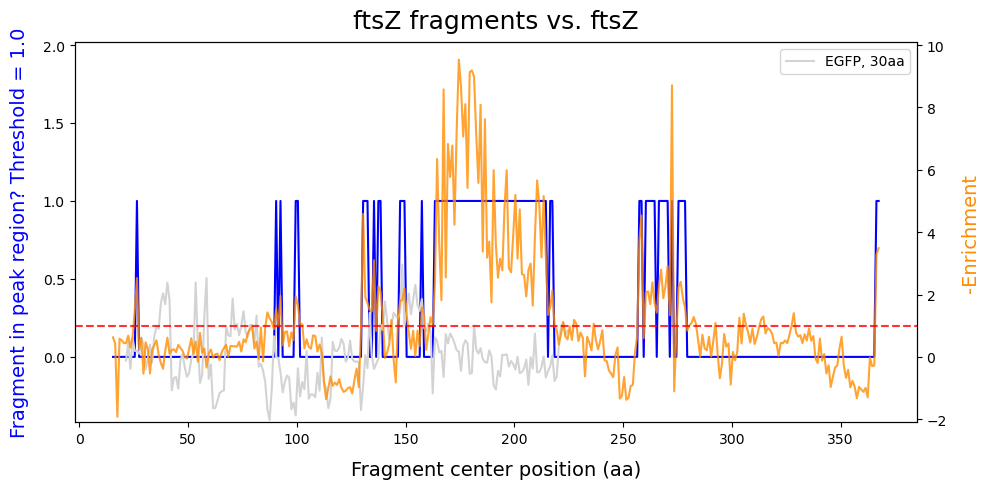

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_isPeak(Threshold=1.5)__ftsZ_frags_+_ftsZ__with-EGFP-control


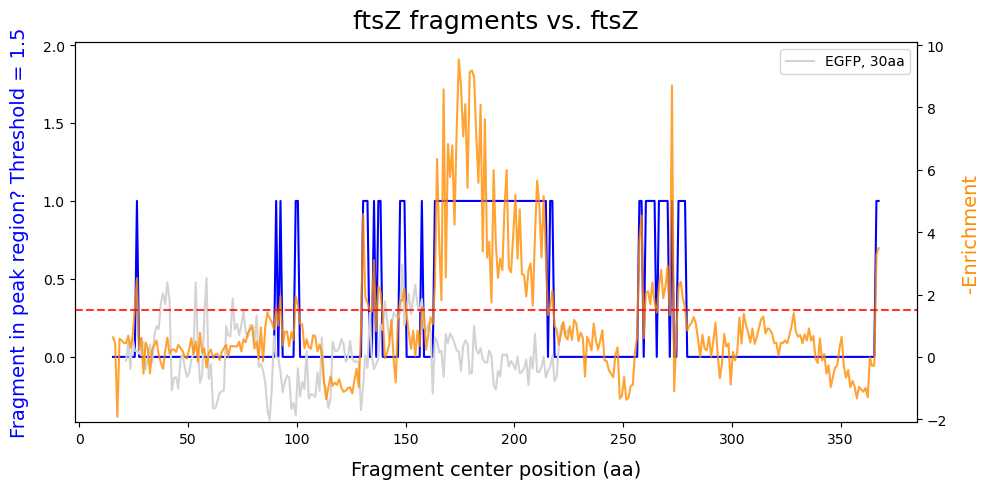

/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/E(30aa frags)_vs_isPeak(Threshold=2.0)__ftsZ_frags_+_ftsZ__with-EGFP-control


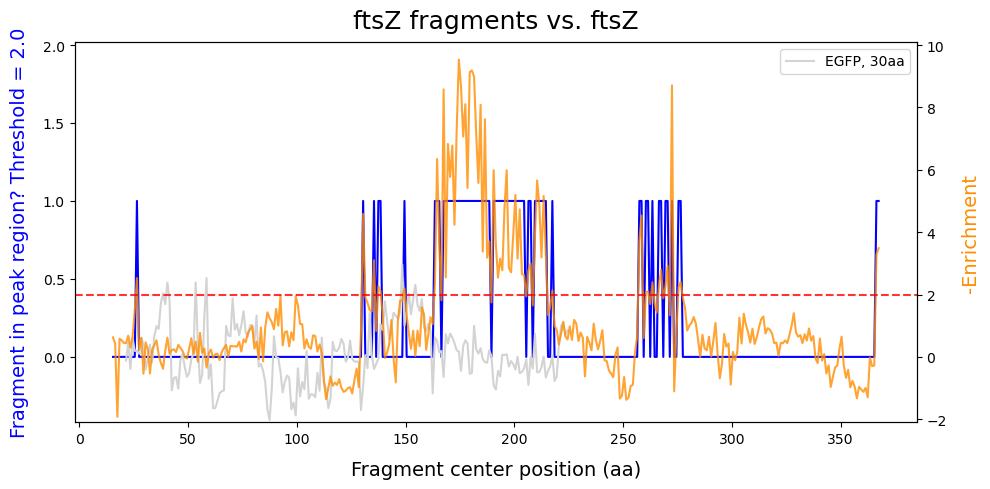

In [52]:
## EGFP enrichment (E) data, peaks, and EGFP data overlaid, for case of FtsZ

threshold = 1.0
contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['ftsZ']
protein_partners =\
['ftsZ']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df_plus_peaks[(predVsExpt_df_plus_peaks['fragmented_protein']==genes[i])&\
                               (predVsExpt_df_plus_peaks['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df_plus_peaks['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df_plus_peaks[(predVsExpt_df_plus_peaks['fragmented_protein']==genes[i])&\
                               (predVsExpt_df_plus_peaks['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df_plus_peaks['aa.fragmentLength']==14)]
    y1 = analysisDF['is_peak__-Enrichment>1.5_fragLen=30']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter']
    
    controlDF = inhibition_df[(inhibition_df['fragmented_protein']=='EGFP')]
    controlDF = controlDF[controlDF['aa.fragmentLength']==30]
    x3 = controlDF['aa.fragmentCenter'] 
    y3 = -controlDF['E = inhibitory effect (enrichment)']
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    if genes[i]!='lptG':
        line1, = ax2.plot(x3,y3,color='lightgrey')
        ax.legend([line1], ['EGFP, 30aa'])
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange',alpha=0.8)
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('Fragment in peak region?'+' Threshold = '+str(threshold)),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 0.2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    plt.axhline(y = threshold, color = 'r', linestyle = '--',alpha=0.8)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_isPeak(Threshold=' + str(threshold) + ')__'\
    + genes[i] + '_frags_+_'+ protein_partners[i] + '__with-EGFP-control'
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()
    


threshold = 1.5
contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['ftsZ']
protein_partners =\
['ftsZ']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df_plus_peaks[(predVsExpt_df_plus_peaks['fragmented_protein']==genes[i])&\
                               (predVsExpt_df_plus_peaks['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df_plus_peaks['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df_plus_peaks[(predVsExpt_df_plus_peaks['fragmented_protein']==genes[i])&\
                               (predVsExpt_df_plus_peaks['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df_plus_peaks['aa.fragmentLength']==14)]
    y1 = analysisDF['is_peak__-Enrichment>1.5_fragLen=30']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter']
    
    controlDF = inhibition_df[(inhibition_df['fragmented_protein']=='EGFP')]
    controlDF = controlDF[controlDF['aa.fragmentLength']==30]
    x3 = controlDF['aa.fragmentCenter'] 
    y3 = -controlDF['E = inhibitory effect (enrichment)']
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    if genes[i]!='lptG':
        line1, = ax2.plot(x3,y3,color='lightgrey')
        ax.legend([line1], ['EGFP, 30aa'])
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange',alpha=0.8)
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('Fragment in peak region?'+' Threshold = '+str(threshold)),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 0.2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    plt.axhline(y = threshold, color = 'r', linestyle = '--',alpha=0.8)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_isPeak(Threshold=' + str(threshold) + ')__'\
    + genes[i] + '_frags_+_'+ protein_partners[i] + '__with-EGFP-control'
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()
    


## EGFP enrichment (E) data, peaks, and EGFP data overlaid, for case of FtsZ, THRESHOLD #2

threshold = 2.0
contact_dist = 3.5
#genes = predVsExpt_df['fragmented_protein'].unique()
genes = ['ftsZ']
protein_partners =\
['ftsZ']

for i in np.arange(0,len(genes),1):
    analysisDF = predVsExpt_df_plus_peaks[(predVsExpt_df_plus_peaks['fragmented_protein']==genes[i])&\
                               (predVsExpt_df_plus_peaks['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df_plus_peaks['aa.fragmentLength']==30)]
    if genes[i]=='lptG':
        analysisDF = predVsExpt_df_plus_peaks[(predVsExpt_df_plus_peaks['fragmented_protein']==genes[i])&\
                               (predVsExpt_df_plus_peaks['protein_partner']==protein_partners[i])&\
                              (predVsExpt_df_plus_peaks['aa.fragmentLength']==14)]
    y1 = analysisDF['is_peak__-Enrichment>2.0_fragLen=30']
    x1 = analysisDF['aa.fragmentCenter'] 
    y2 = -analysisDF['E = inhibitory effect (enrichment)']
    x2 = analysisDF['aa.fragmentCenter']
    
    controlDF = inhibition_df[(inhibition_df['fragmented_protein']=='EGFP')]
    controlDF = controlDF[controlDF['aa.fragmentLength']==30]
    x3 = controlDF['aa.fragmentCenter'] 
    y3 = -controlDF['E = inhibitory effect (enrichment)']
    
    fig, ax = plt.subplots(figsize=(10,5))
    ax2 = ax.twinx()
    
    if genes[i]!='lptG':
        line1, = ax2.plot(x3,y3,color='lightgrey')
        ax.legend([line1], ['EGFP, 30aa'])
    
    ax.plot(x1,y1,color='blue')
    ax2.plot(x2,y2,color='darkorange',alpha=0.8)
    ax.set_xlabel('Fragment center position (aa)',fontsize=14,labelpad=10)
    ax.set_ylabel(('Fragment in peak region?'+' Threshold = '+str(threshold)),color='blue',fontsize=14,labelpad=10)
    ax2.set_ylabel('-Enrichment',color='darkorange',fontsize=14,labelpad=10)
    
    if genes[i]=='folA':
        Emin = -3.1; Emax = 9.1; f = 1
        
    if genes[i]=='ftsZ':
        Emin = -2.1; Emax = 10.1; f = 0.2
    
    if genes[i]=='gyrA':
        Emin = -3.1; Emax = 11.1; f = 3
        
    if genes[i]=='lptG':
        Emin = -2.1; Emax = 4.1; f = 3.5
        
    if genes[i]=='rpIL':
        Emin = -2.1; Emax = 8.1; f = 1.5
        
    if genes[i]=='groL':
        Emin = -3.1; Emax = 8.1; f = 3
    
    if genes[i]=='ssb':
        Emin = -2.1; Emax = 8.1; f = 2
    
    ax2range = [Emin, Emax]
    ax1range = [f*Emin,f*Emax]
    ax2.set_ylim(ax2range)
    ax.set_ylim(ax1range)
    
    
    title = genes[i] + ' fragments vs. ' + protein_partners[i]
    plt.title(title,fontsize=18,pad=10)
    plt.axhline(y = threshold, color = 'r', linestyle = '--',alpha=0.8)
    path = '/home/gridsan/asavinov/keatinglab_shared/swans/savinovCollaboration/analysis/figures/'
    figTitle = path + 'E(30aa frags)_vs_isPeak(Threshold=' + str(threshold) + ')__'\
    + genes[i] + '_frags_+_'+ protein_partners[i] + '__with-EGFP-control'
    /print figTitle
    plt.tight_layout()
    plt.savefig((figTitle + '.png'),dpi=600)
    plt.savefig((figTitle + '.pdf'))
    plt.show()
    

    

